# **Peswa Finance: Senior Machine Learning Engineer Take-Home Project**

> **Project Title:** Predicting Loan Default Risk<br>
> **Name:** Louis Amakye <br>
> **LinkedIN:** https://www.linkedin.com/in/louis-amakye-34358816b/<br>
> **Email:** louisamakye20@gmail.com

## Table of Contents

* [Pace Stages](#ps)
* [Pace: Plan](#pace)
    * [Problem Statement](#ps)
    * [Hypothesis](#hs)
    * [Project Goal](#pg)
    * [Information Needed](#in)
    * [Step 1](#st1)
      * [Importing Packages](#ip)
      * [Load Dataset](#ld)
    * [Step 2](#st2)
* [pAce: Analyze Stage](#pace1)
    * [EDA 2](#st3)
    * [Data Visualization](#dv)
    * [A/B Testing](#abt)
    * [Chi Square Testing](#abtc)
    * [Insights](#is)
* [paCe: Construct Stage](#con)
    * [Step 3 ](#st4)
      * [Preprocessing and Feature Engineering](#fe)
      * [Decision Tree ](#dt)
      * [Model Interpretation](#mi)
      * [Tune XGBClassifier for Explainable](#ex)
* [pacE: Execute Stage](#es)      
   * [Conclusion and Recommendation](#cr)
* [Reference](#r)

# **PACE stages** <a id='ps'></a>


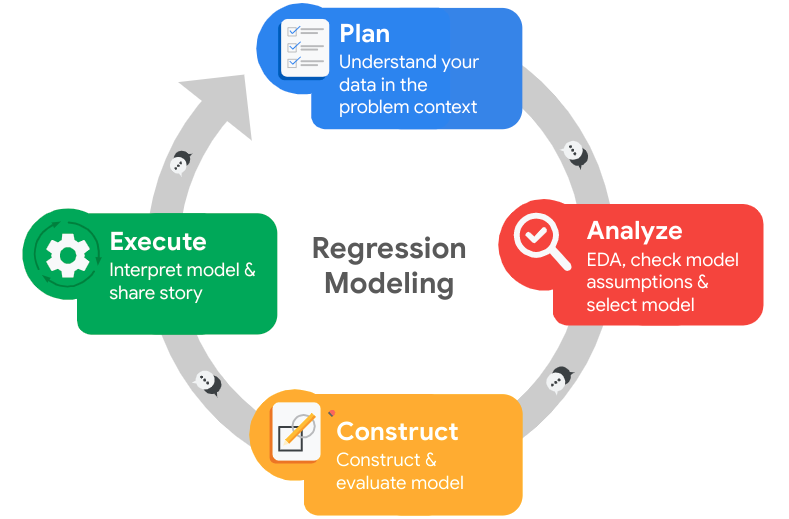

## 1.0  **Pace: Plan** <a id='pace'></a>


## 1.1 Business Problem Understanding<a id='bp'></a>

At **Peswa Finance**, we provide financial services that rely on data-driven decision-making. One
key challenge is assessing the risk associated with loan applicants. In this take-home project,
your task is to build a machine learning model that predicts whether a loan applicant is likely
to default on their loan based on historical application and repayment data.



### 1.2 Hypothesis <a id='hs'></a>

<p style="text-align:justify;">It is possible to predict that whether or not debtor will default loan using machine learning model?</p>

### 1.3 Project Goal <a id='pg'></a>

<p style="text-align:justify;">In this project, I seek to provide data-driven decison by achieving the following goals;</p>

1. Explore and clean the dataset – Handle missing values, outliers, and inconsistencies.
2. Perform feature engineering – Identify and create meaningful features that improve
model performance.
3. Train and evaluate an ML model – Develop a model to predict loan default risk.
4. Explain your approach – Justify your choice of preprocessing techniques, model
selection, and hyperparameter tuning.
5. Ensure model interpretability – Provide insights into what features contribute most to
default prediction.
6. Deployability consideration (Optional but a plus) – Package your solution for
deployment (e.g., expose it via an API).

### 1.4 Information Provided <a id='in'></a>



Variable  |Description |
-----|-----|
loan_id|Unique loan identifier|
customer_id|Unique customer identifier|
loan_amount|Amount of the loan (GHS)|
term|Duration of the loan in months|
monthly_income|Customer's monthly income (GHS)
interest_rate|Annual interest rate (%) company (years)
credit_score|Customer's credit score (range: 300-850)
employment_status|Employment type (Employed, Self-Employed Unemployed)
loan_purpose|Purpose of the loan (Education, Business, Personal, etc.)
num_previous_loans|Number of previous loans taken
default_history|Number of times the customer defaulted in the past
loan_default|Target variable (1 = Defaulted, 0 = Paid in full)

## Step 1. Imports<a id='st1'></a>

*   Import packages
*   Load dataset



### Import packages<a id='ip'></a>

In [4]:
# Import packages
# For data manipulation
import numpy as np
import pandas as pd
import scipy.stats as stats
from statsmodels.stats.contingency_tables import Table2x2
from scipy.stats import chi2_contingency
# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For displaying all of the columns in dataframes
%matplotlib inline


pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows", 150)
sns.set_style("darkgrid")
plt.rcParams["font.size"] = 14
plt.rcParams["figure.figsize"] =(12,8)
plt.rcParams["figure.facecolor"] = "#00000000"

# For data modeling

from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.utils.class_weight import compute_sample_weight
import shap

# For metrics and preprocessing
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.tree import plot_tree
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
# For saving models
import pickle

### Load dataset<a id='ld'></a>

In [5]:
# Load dataset into a dataframe
df = pd.read_csv("/content/loan_data.csv")
df.head()

,loan_id,customer_id,loan_amount,term,interest_rate,monthly_income,credit_score,employment_status,loan_purpose,num_previous_loans,default_history,loan_default
0,L1000,C5000,16795,12,9.92,16577,601,Self-Employed,Medical,1,3,1
1,L1001,C5001,1860,12,8.21,794,830,Unemployed,Education,0,3,0
2,L1002,C5002,39158,60,8.73,10677,517,Self-Employed,Home Improvement,4,2,1
3,L1003,C5003,45732,48,10.70,10382,401,Self-Employed,Business,1,1,0
4,L1004,C5004,12284,36,8.47,1636,587,Unemployed,Home Improvement,1,0,0


## Step 2. Data Exploration (Initial EDA and data cleaning)<a id='st2'></a>



### Gather basic information about the data

In [3]:
# Gather basic information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   loan_id             500 non-null    object 
 1   customer_id         500 non-null    object 
 2   loan_amount         500 non-null    int64  
 3   term                500 non-null    int64  
 4   interest_rate       500 non-null    float64
 5   monthly_income      500 non-null    int64  
 6   credit_score        500 non-null    int64  
 7   employment_status   500 non-null    object 
 8   loan_purpose        500 non-null    object 
 9   num_previous_loans  500 non-null    int64  
 10  default_history     500 non-null    int64  
 11  loan_default        500 non-null    int64  
dtypes: float64(1), int64(7), object(4)
memory usage: 47.0+ KB


### Gather descriptive statistics about the data

In [4]:
# Gather descriptive statistics about the data
df.describe()

,loan_amount,term,interest_rate,monthly_income,credit_score,num_previous_loans,default_history,loan_default
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000
mean,24579.954000,30.168000,15.029260,10081.222000,581.034000,4.372000,2.07400,0.274000
std,14729.360184,19.026081,5.835512,5597.779805,159.196583,2.899384,1.41723,0.446456
min,1161.000000,6.000000,5.090000,511.000000,306.000000,0.000000,0.00000,0.000000
25%,11593.250000,12.000000,9.667500,5245.750000,444.500000,2.000000,1.00000,0.000000
50%,24287.500000,24.000000,15.085000,10078.000000,576.000000,4.000000,2.00000,0.000000
75%,38200.500000,48.000000,20.255000,14790.000000,721.000000,7.000000,3.00000,1.000000
max,49984.000000,60.000000,24.960000,19981.000000,849.000000,9.000000,4.00000,1.000000


In [5]:
# Display all column names
df.columns

Index(['loan_id', 'customer_id', 'loan_amount', 'term', 'interest_rate',
       'monthly_income', 'credit_score', 'employment_status', 'loan_purpose',
       'num_previous_loans', 'default_history', 'loan_default'],
      dtype='object')

In [14]:
def unique_values(df):
    # Select categorical columns and exclude 'loan_id' and 'customer_id'
    cat = [col for col in df.select_dtypes(include=['object']).columns if col not in ['loan_id', 'customer_id']]

    # Check if there are categorical columns to process
    if not cat:
        print("No categorical columns found.")
        return
    # Loop through the categorical columns and print unique values
    for feature in cat:
        print(f"The unique values in '{feature}' are: {df[feature].unique()}")


In [15]:
unique_values(df)

The unique values in 'employment_status' are: ['Self-Employed' 'Unemployed' 'Employed']
The unique values in 'loan_purpose' are: ['Medical' 'Education' 'Home Improvement' 'Business' 'Personal']


### Check missing values

Check for any missing values in the data.

In [16]:
# Check for missing values
df.isna().sum()

,0
loan_id,0
customer_id,0
loan_amount,0
term,0
interest_rate,0
monthly_income,0
credit_score,0
employment_status,0
loan_purpose,0
num_previous_loans,0


There are no missing values in the data.

### Check duplicates

Check for any duplicate entries in the data.

In [9]:
# Check for duplicates
df.duplicated().sum()

np.int64(0)

In [10]:
# Inspect some rows containing duplicates as needed
df[df.duplicated()].head()

,loan_id,customer_id,loan_amount,term,interest_rate,monthly_income,credit_score,employment_status,loan_purpose,num_previous_loans,default_history,loan_default


The above output shows that there are no duplicates in the data

In [6]:
# Drop duplicates
df1 = df.drop_duplicates(keep='first')

# Display first few rows of new dataframe as needed
df1.head()

,loan_id,customer_id,loan_amount,term,interest_rate,monthly_income,credit_score,employment_status,loan_purpose,num_previous_loans,default_history,loan_default
0,L1000,C5000,16795,12,9.92,16577,601,Self-Employed,Medical,1,3,1
1,L1001,C5001,1860,12,8.21,794,830,Unemployed,Education,0,3,0
2,L1002,C5002,39158,60,8.73,10677,517,Self-Employed,Home Improvement,4,2,1
3,L1003,C5003,45732,48,10.70,10382,401,Self-Employed,Business,1,1,0
4,L1004,C5004,12284,36,8.47,1636,587,Unemployed,Home Improvement,1,0,0


### Check outliers

Check for outliers in the data.

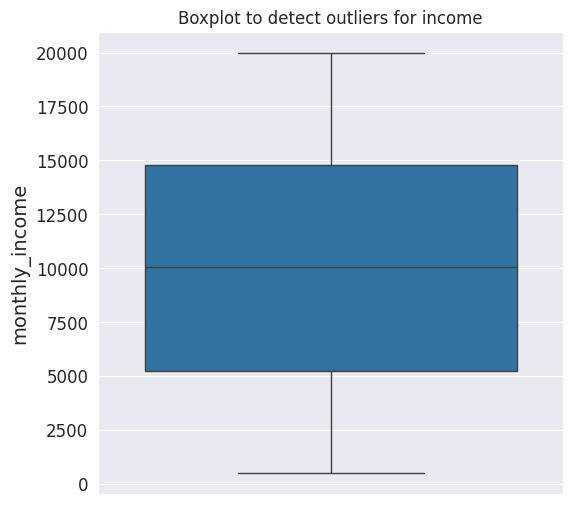

In [12]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
plt.figure(figsize=(6,6))
plt.title('Boxplot to detect outliers for income', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.boxplot(df1['monthly_income'])
plt.show()

In [18]:
# Compute the 25th percentile value in `monthly_income`
percentile25 = df1['monthly_income'].quantile(0.25)

# Compute the 75th percentile value in `monthly_income`
percentile75 = df1['monthly_income'].quantile(0.75)

# Compute the interquartile range in `monthly_income`
iqr = percentile75 - percentile25

# Define the upper limit and lower limit for non-outlier values in `monthly_income`
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print("Lower limit:", lower_limit)
print("Upper limit:", upper_limit)

# Identify subset of data containing outliers in `monthly_income`
outliers = df1[(df1['monthly_income'] > upper_limit) | (df1['monthly_income'] < lower_limit)]

# Count how many rows in the data contain outliers in `monthly_income`
print("Number of rows in the data containing outliers in `monthly_income`:", len(outliers))

Lower limit: -9070.625
Upper limit: 29106.375
Number of rows in the data containing outliers in `monthly_income`: 0


The boxplot and iqr above shows that there are no outliers in the `monthly_income` variable.

It would be helpful to investigate to avoid unneccessary  computation to remove outliers

# pAce: Analyze Stage<a id='pace1'></a>
- Perform EDA (analyze relationships between variables)


### To achieve the first goal, we will try to answer the questions listed below:

- Is theere any relationships between the variables variables?
- What are the distributions in the data?
- How do interest rate , income, loan term and repayment history cause loan default?




## Step 2. Data Exploration (Continue EDA)<a id='st3'></a>


In [19]:
# Get numbers of people who left vs. stayed
print(df1['loan_default'].value_counts())
print()

# Get percentages of people who left vs. stayed
print(df1['loan_default'].value_counts(normalize=True))

loan_default
0    363
1    137
Name: count, dtype: int64

loan_default
0    0.726
1    0.274
Name: proportion, dtype: float64


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   loan_id             500 non-null    object 
 1   customer_id         500 non-null    object 
 2   loan_amount         500 non-null    int64  
 3   term                500 non-null    int64  
 4   interest_rate       500 non-null    float64
 5   monthly_income      500 non-null    int64  
 6   credit_score        500 non-null    int64  
 7   employment_status   500 non-null    object 
 8   loan_purpose        500 non-null    object 
 9   num_previous_loans  500 non-null    int64  
 10  default_history     500 non-null    int64  
 11  loan_default        500 non-null    int64  
dtypes: float64(1), int64(7), object(4)
memory usage: 47.0+ KB


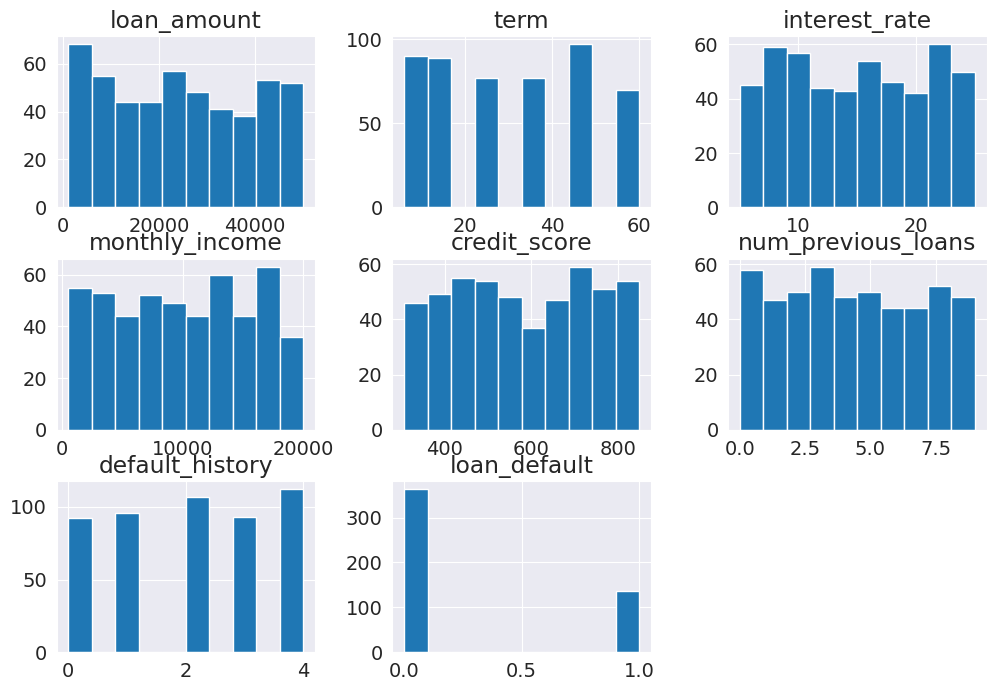

In [ ]:
# plot histogram for catgoricals
df1.hist()
plt.show()

In [ ]:
df1.groupby('loan_default')[["loan_amount",'term','interest_rate','monthly_income', 'credit_score', 'num_previous_loans',
                     "default_history"]].mean()

,loan_amount,term,interest_rate,monthly_income,credit_score,num_previous_loans,default_history
loan_default,,,,,,,
0,24952.438017,29.768595,14.726281,10083.192837,576.338843,4.338843,2.016529
1,23593.007299,31.226277,15.832044,10076.000000,593.474453,4.459854,2.226277


### Data visualizations<a id='dv'></a>

In [7]:
# create new columns (feature engineerng) for better understanding by binning features
def new_features(df):
    # compute yearly debt to income ratio
    df = df.copy()
    df['dti_ratio'] = (df['loan_amount'] / (df['monthly_income']*12))* 100
    bins = [0, 30, 50, 60, float('inf')]
    labels = ['Low Risk', 'Moderate Risk',  'High Risk', 'Very High Risk']

    # Add a new column with the risk category
    df['risk_category'] = pd.cut(df['dti_ratio'], bins=bins, labels=labels, right=True)

    # Bin credit_score using the Fico Model
    bins = [300, 579, 669, 739, 799, 850]
    labels = ['Poor', 'Fair', 'Good', 'Very Good', 'Excellent']
    df['credit_score_category'] = pd.cut(df['credit_score'], bins=bins, labels=labels, right=True)

    # Bin interest_rate based on quantiles
    quantiles = df['interest_rate'].quantile([0.33, 0.67]).values
    df['interest_rate_category'] = pd.cut(df['interest_rate'], bins=[df['interest_rate'].min(), quantiles[0], quantiles[1], df['interest_rate'].max()],
                                           labels=['Low', 'Medium', 'High'], include_lowest=True)

    # Bin term u
    df['term_category'] = pd.cut(df['term'], bins=[0, 12, 36, df['term'].max()], labels=['Short', 'Medium', 'Long'], include_lowest=True)

    # Bin monthly_income using the category from BoG
    income_bins = [0, 2500, 7500, 20000, float('inf')]
    income_labels = ['Low Income Group', 'Lower-Middle Income', 'Upper-Middle Income', 'High-Income Group']
    df['income_category'] = pd.cut(df['monthly_income'], bins=income_bins, labels=income_labels, right=True)

    # Decode loan_default
    df['loan_default_decoded'] = df['loan_default'].apply(lambda x: 'Defaulted' if x == 1 else 'Paid In Full')
    df['applicant_type'] = df['num_previous_loans'].apply(lambda x: 'First-Timer' if x == 0 else 'Existing')

    # default rate
    df["default_ratio"] = np.where(df["num_previous_loans"] != 0, df["default_history"] / df["num_previous_loans"], 0)

    # monthly payment
    df["monthly_payment"] = round((df["loan_amount"]* (1+(df["interest_rate"]/100)))/df["term"],2)

    return df


In [8]:
#
df1 = new_features(df1)

In [91]:
def aggregate_values(df, col, col1):

  return df.groupby([col]).agg({col1:"mean"})

In [92]:
aggregate_values(df1,'interest_rate_category','interest_rate')

<ipython-input-91-d69b59e47d08>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return df.groupby([col]).agg({col1:"mean"})


,interest_rate
interest_rate_category,
Low,8.243091
Medium,15.008118
High,21.837212


In [22]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   loan_id                 500 non-null    object  
 1   customer_id             500 non-null    object  
 2   loan_amount             500 non-null    int64   
 3   term                    500 non-null    int64   
 4   interest_rate           500 non-null    float64 
 5   monthly_income          500 non-null    int64   
 6   credit_score            500 non-null    int64   
 7   employment_status       500 non-null    object  
 8   loan_purpose            500 non-null    object  
 9   num_previous_loans      500 non-null    int64   
 10  default_history         500 non-null    int64   
 11  loan_default            500 non-null    int64   
 12  dti_ratio               500 non-null    float64 
 13  risk_category           500 non-null    category
 14  credit_score_category   50

In [23]:
df1.head()

,loan_id,customer_id,loan_amount,term,interest_rate,monthly_income,credit_score,employment_status,loan_purpose,num_previous_loans,default_history,loan_default,dti_ratio,risk_category,credit_score_category,interest_rate_category,term_category,income_category,loan_default_decoded,applicant_type,default_ratio,monthly_payment
0,L1000,C5000,16795,12,9.92,16577,601,Self-Employed,Medical,1,3,1,8.442923,Low Risk,Fair,Low,Short,Upper-Middle Income,Defaulted,Existing,3.0,1538.42
1,L1001,C5001,1860,12,8.21,794,830,Unemployed,Education,0,3,0,19.521411,Low Risk,Excellent,Low,Short,Low Income Group,Paid In Full,First-Timer,0.0,167.73
2,L1002,C5002,39158,60,8.73,10677,517,Self-Employed,Home Improvement,4,2,1,30.562580,Moderate Risk,Poor,Low,Long,Upper-Middle Income,Defaulted,Existing,0.5,709.61
3,L1003,C5003,45732,48,10.70,10382,401,Self-Employed,Business,1,1,0,36.707763,Moderate Risk,Poor,Low,Long,Upper-Middle Income,Paid In Full,Existing,1.0,1054.69
4,L1004,C5004,12284,36,8.47,1636,587,Unemployed,Home Improvement,1,0,0,62.571312,Very High Risk,Fair,Low,Medium,Low Income Group,Paid In Full,Existing,0.0,370.12


In [ ]:
df1.describe()

,loan_amount,term,interest_rate,monthly_income,credit_score,num_previous_loans,default_history,loan_default,dti_ratio,default_ratio,monthly_payment
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000,500.000000
mean,24579.954000,30.168000,15.029260,10081.222000,581.034000,4.372000,2.07400,0.274000,41.973399,0.579323,1761.633180
std,14729.360184,19.026081,5.835512,5597.779805,159.196583,2.899384,1.41723,0.446456,70.863630,0.785738,2066.674886
min,1161.000000,6.000000,5.090000,511.000000,306.000000,0.000000,0.00000,0.000000,0.543021,0.000000,24.260000
25%,11593.250000,12.000000,9.667500,5245.750000,444.500000,2.000000,1.00000,0.000000,9.376865,0.000000,463.497500
50%,24287.500000,24.000000,15.085000,10078.000000,576.000000,4.000000,2.00000,0.000000,20.092989,0.333333,888.575000
75%,38200.500000,48.000000,20.255000,14790.000000,721.000000,7.000000,3.00000,1.000000,40.530737,0.750000,2199.437500
max,49984.000000,60.000000,24.960000,19981.000000,849.000000,9.000000,4.00000,1.000000,588.460632,4.000000,9849.700000


In [24]:
# function to plot piechart
def plot_pie_chart(df, col='loan_default_decoded'):
  # Count the occurrences of each group
  group_counts = df1[col].value_counts()

  plt.figure(figsize=(8, 6))
  group_counts.plot.pie(autopct='%1.1f%%', startangle=90)
  plt.ylabel('')
  plt.title('Distribution of Customers')


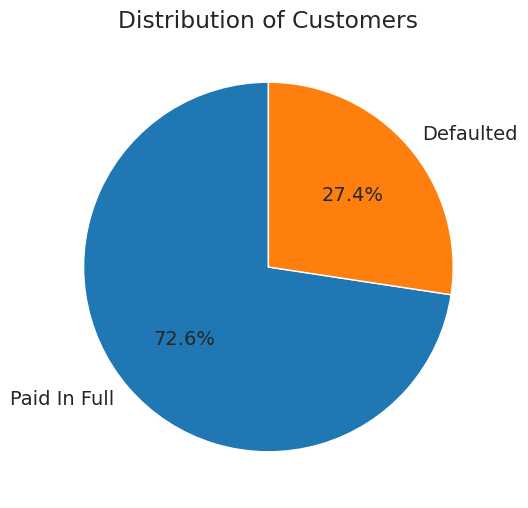

In [ ]:
# piechart for loan default type
plot_pie_chart(df1)

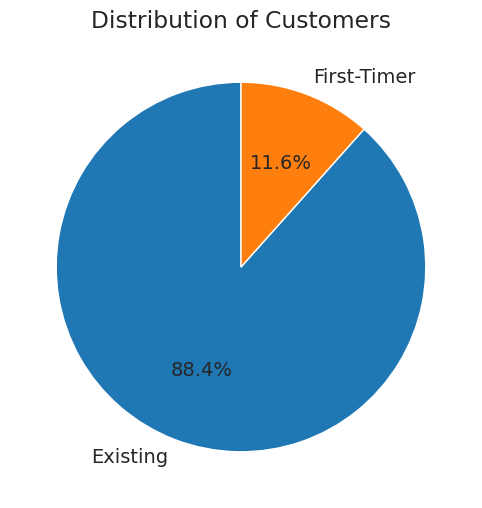

In [25]:
# piechart for 'applicant_type'
plot_pie_chart(df1, 'applicant_type')

In [26]:
df1.columns

Index(['loan_id', 'customer_id', 'loan_amount', 'term', 'interest_rate',
       'monthly_income', 'credit_score', 'employment_status', 'loan_purpose',
       'num_previous_loans', 'default_history', 'loan_default', 'dti_ratio',
       'risk_category', 'credit_score_category', 'interest_rate_category',
       'term_category', 'income_category', 'loan_default_decoded',
       'applicant_type', 'default_ratio', 'monthly_payment'],
      dtype='object')

In [27]:
def plot_histogram(df, hue1, hue2, x='loan_default_decoded'):
  title = hue1.replace('_', ' ').title()
  title1 = hue2.replace('_', ' ').title()
  fig, ax = plt.subplots(1, 2, figsize = (22,8))
  sns.histplot(data=df, x=x, hue=hue1, multiple='dodge', shrink=.5, ax=ax[0])
  ax[0].set_title(f"{title} Distribution", fontsize='14')

  # Plot long-tenured histogram
  sns.histplot(data=df1, x=x, hue=hue2 , discrete=1,
              multiple='dodge', shrink=.4, ax=ax[1])
  ax[1].set_title(f"{title1} Distribution", fontsize='14');



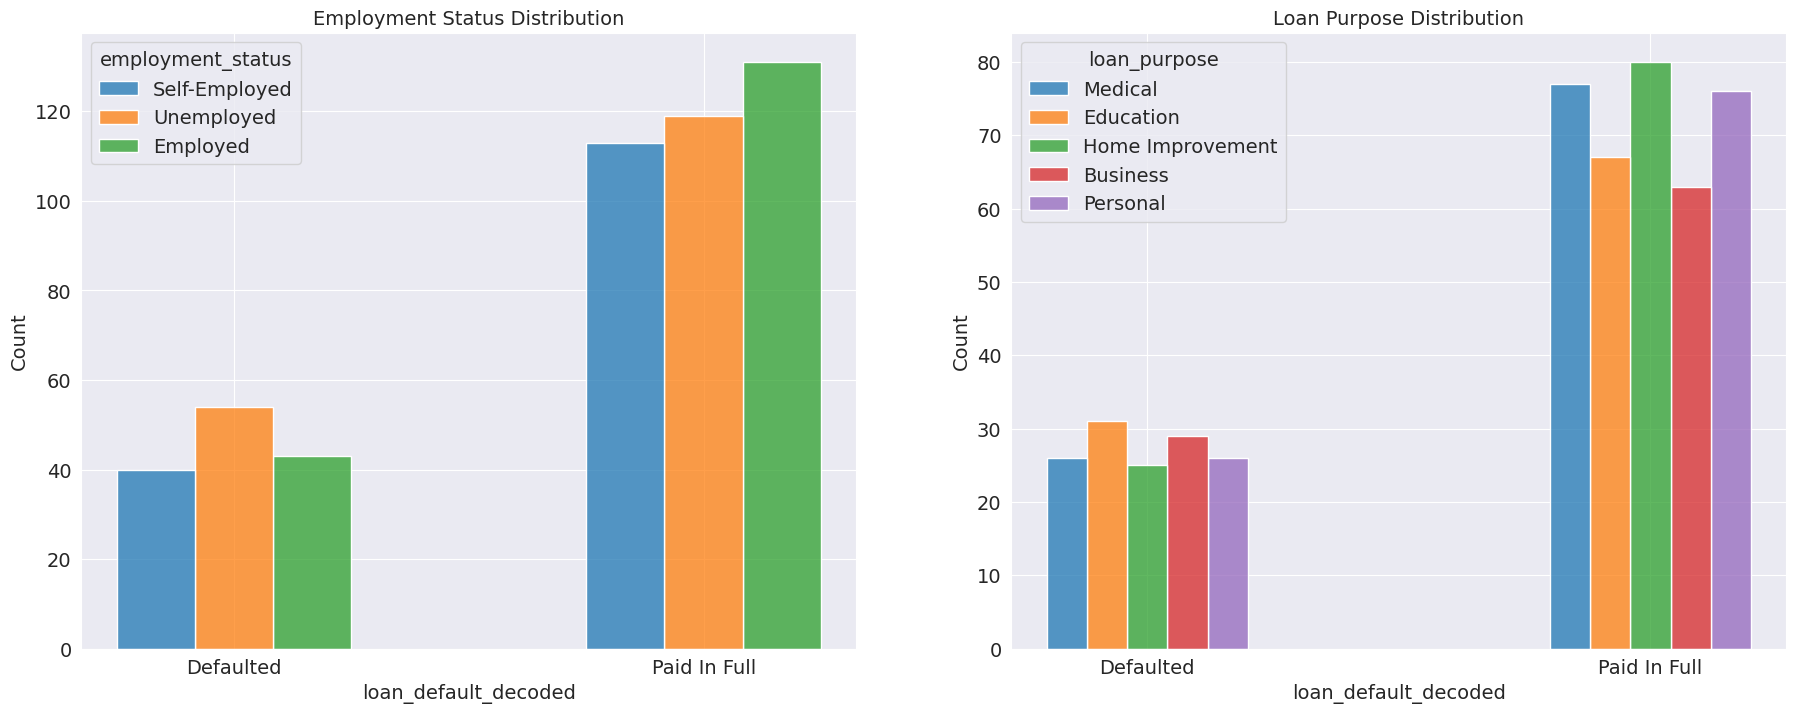

In [ ]:
# histogram for employment_status and loan_purpose
plot_histogram(df1,'employment_status', 'loan_purpose')

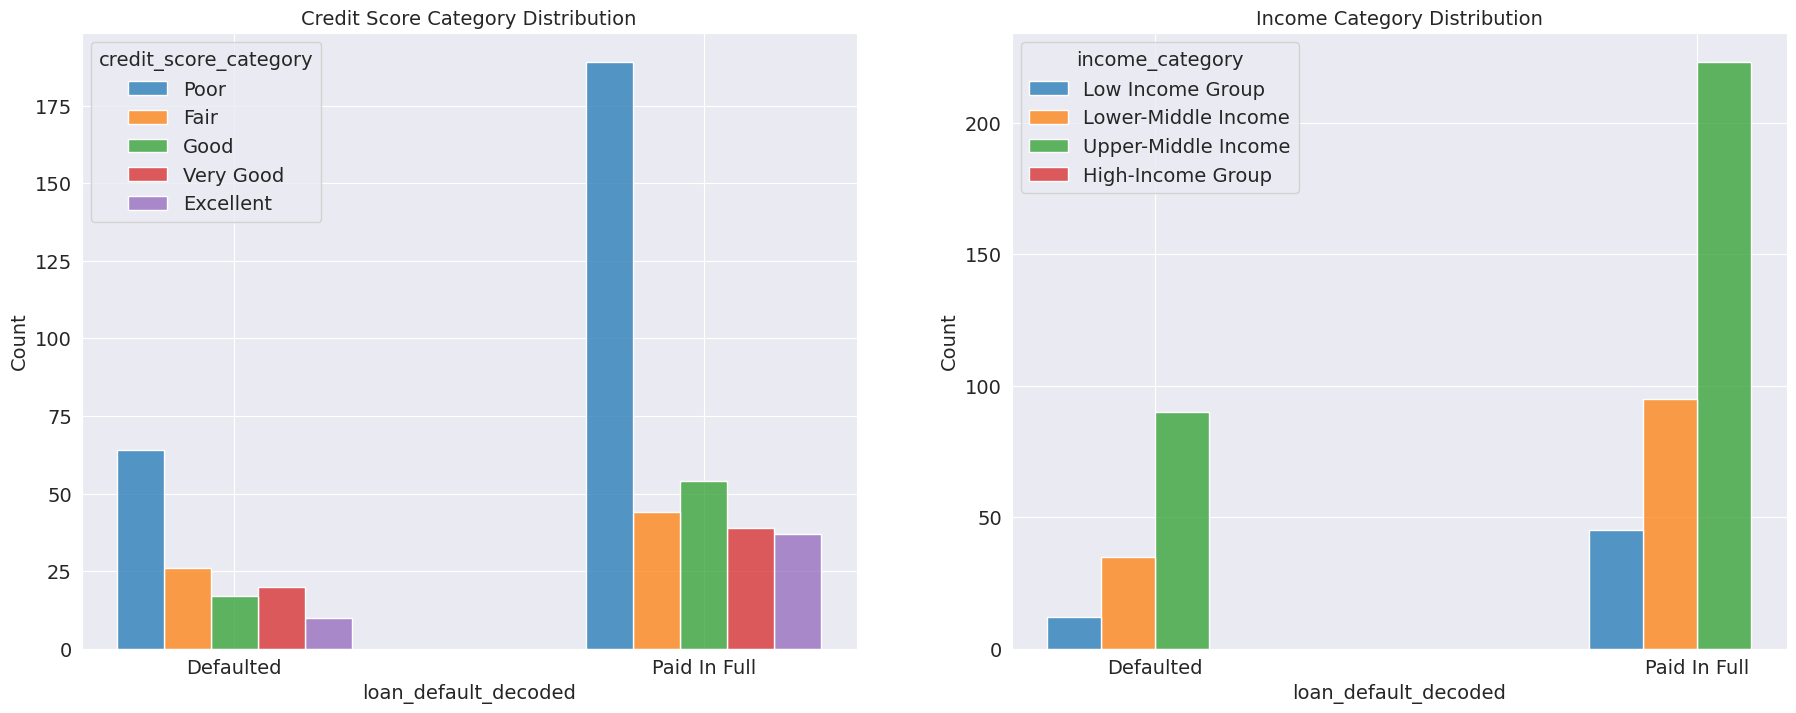

In [ ]:
# histogram for employment_status and loan_purpose
plot_histogram(df1,'credit_score_category', 'income_category')

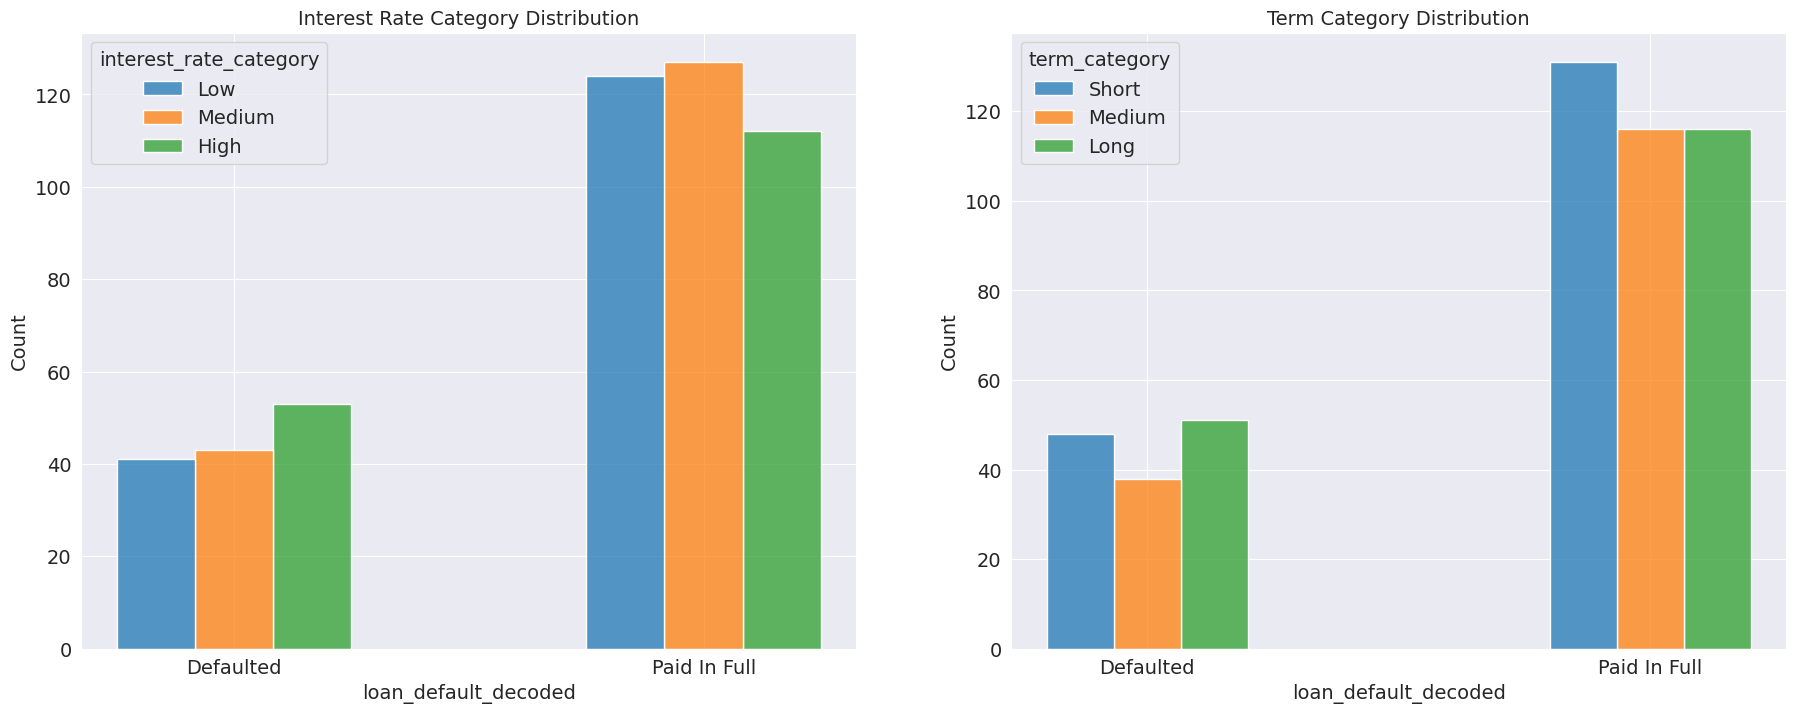

In [ ]:
# histogram for employment_status and loan_purpose
plot_histogram(df1,'interest_rate_category', 'term_category')

In [ ]:
df1.columns

Index(['loan_id', 'customer_id', 'loan_amount', 'term', 'interest_rate',
       'monthly_income', 'credit_score', 'employment_status', 'loan_purpose',
       'num_previous_loans', 'default_history', 'loan_default', 'dti_ratio',
       'risk_category', 'credit_score_category', 'interest_rate_category',
       'term_category', 'income_category', 'loan_default_decoded'],
      dtype='object')

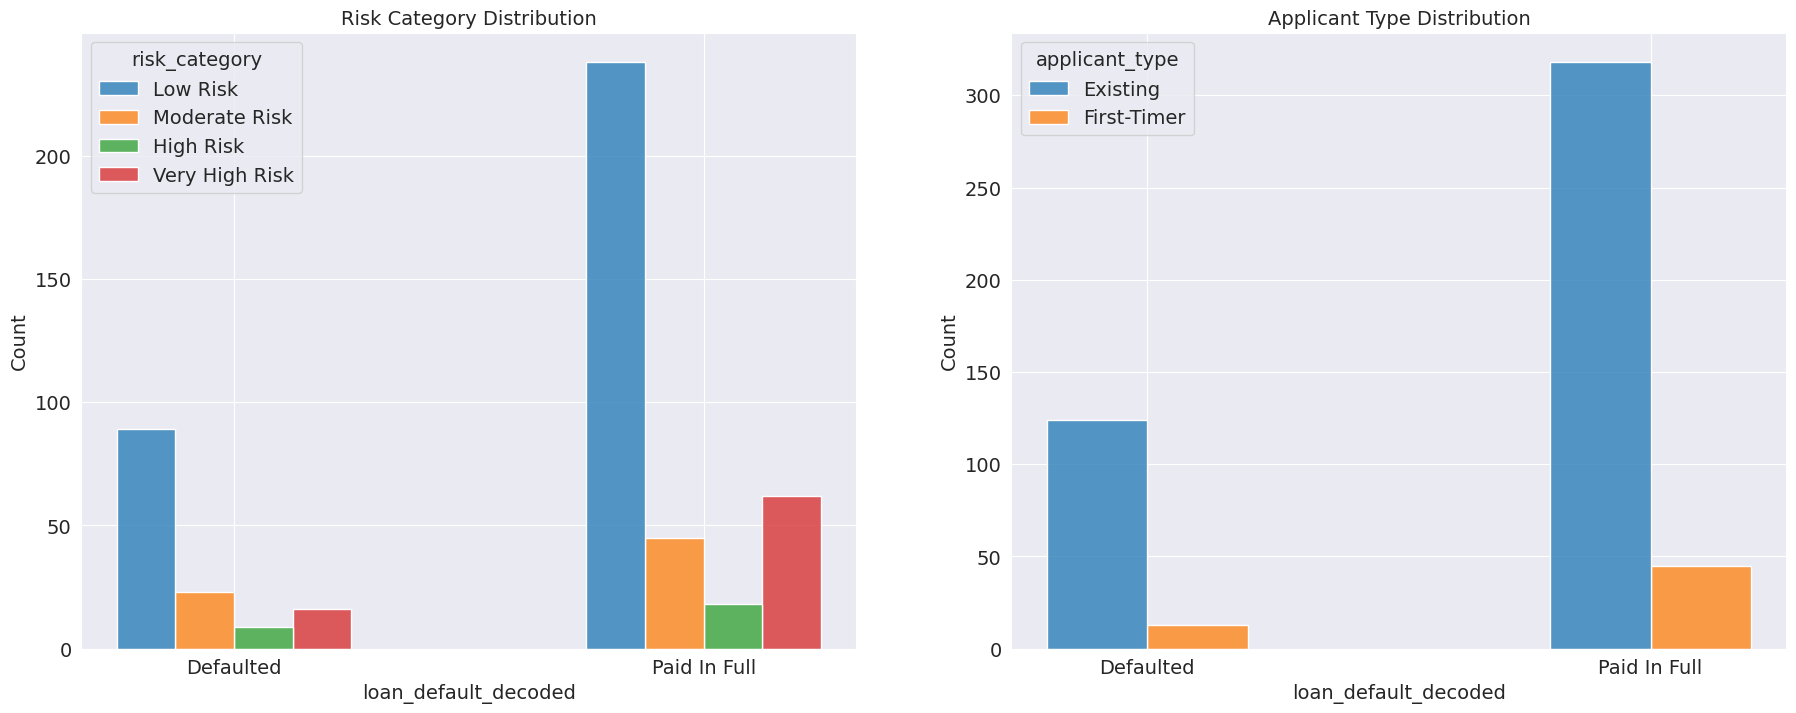

In [ ]:
# histogram for employment_status and loan_purpose
plot_histogram(df1,'risk_category', 'applicant_type')

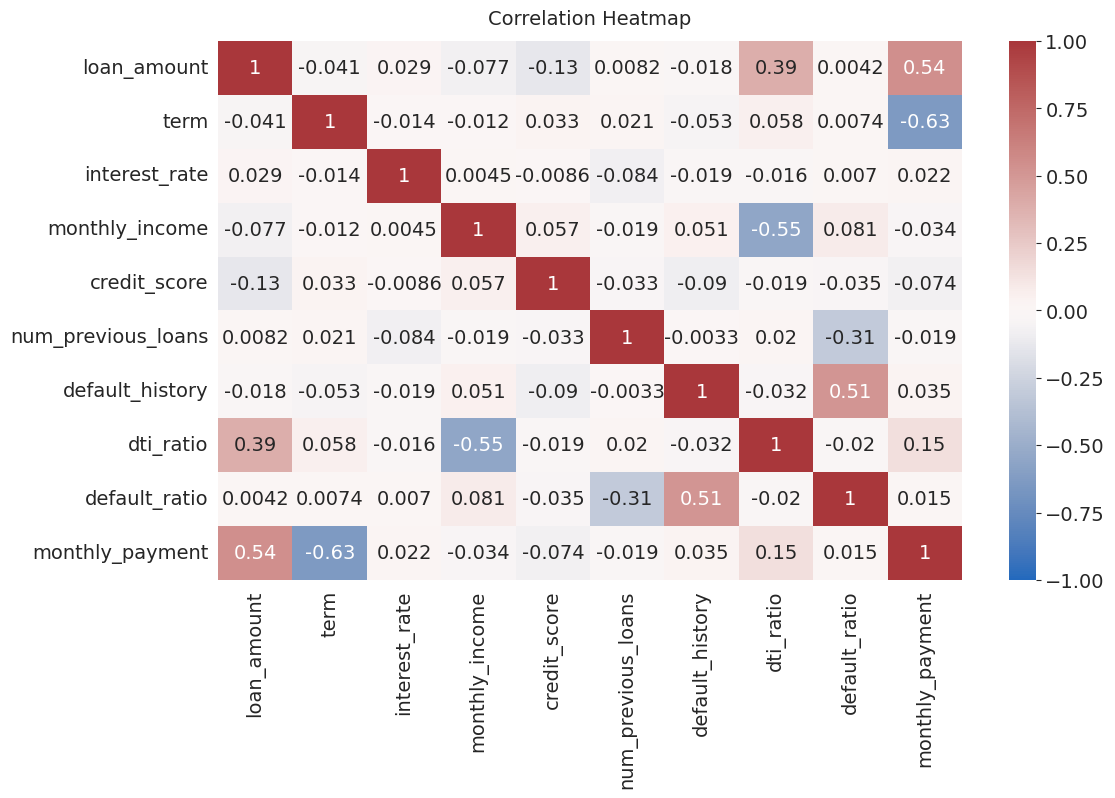

In [ ]:
# Plot a correlation heatmap
plt.figure(figsize=(12, 7))
numeric_col = df1.select_dtypes(include=['number']).columns
df2 = df1[numeric_col].drop('loan_default', axis=1)
heatmap = sns.heatmap(df2.corr(), vmin=-1, vmax=1, annot=True, cmap=sns.color_palette("vlag", as_cmap=True))
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12);

The correlation heatmap confirms that the number of projects, monthly hours, and evaluation scores all have some positive correlation with each other, and whether an employee leaves is negatively correlated with their satisfaction level.

### Statistical Test: A/B Testing <a id='abt'></a>

   ####  Hypothesis 1:

$H_0$: There is no significant difference in debt-to-income ratio between the two groups.

$H_A$: Debtors who defaulted have higher  debt-to-income ratio.

#### Set the significance level:

In [ ]:
# choose significance level of 5%
significance_level = 0.05

In [ ]:
df1.columns

Index(['loan_id', 'customer_id', 'loan_amount', 'term', 'interest_rate',
       'monthly_income', 'credit_score', 'employment_status', 'loan_purpose',
       'num_previous_loans', 'default_history', 'loan_default', 'dti_ratio',
       'risk_category', 'credit_score_category', 'interest_rate_category',
       'term_category', 'income_category', 'loan_default_decoded'],
      dtype='object')

In [ ]:
# Separate the data into two groups
paid_in_full = df1[df1['loan_default'] == 0]['dti_ratio']
defaulted = df1[df1['loan_default'] == 1]['dti_ratio']

# Perform a one-tailed t-test
t_stat, p_value = stats.ttest_ind(defaulted, paid_in_full, alternative='greater')

# Print the results
print("t-statistic:", t_stat)
print("p-value:", p_value)

# Compare the p-value to the significance level
if p_value < significance_level:
    print("Reject the null hypothesis: Debtors who defaulted have higher debt-to-income ratio.")
else:
    print("Fail to reject the null hypothesis: No evidence that Debtors who defaulted have higher debt-to-income ratio.")


t-statistic: -0.9993467498352179
p-value: 0.8409439651507522
Fail to reject the null hypothesis: No evidence that Debtors who defaulted have higher debt-to-income ratio.


With a p-value (0.8409) being greater than 0.05 (as  significance level is 5%)  **we fail to reject the null hypothesis**

Therefore, you can conclude at the 5% significance level that here is no significant difference in debt to income ratio between the two groups. Therefore commitment of paying loan is not dependent of monthly salary

   ####  Hypothesis 2:

$H_0$: There is no significant difference in 'interest rate payment between the two groups'

$H_A$: Debtors who defaulted their loan are charged at higher interest rate.


In [ ]:
# Separate the data into two groups
paid_in_full = df1[df1['loan_default'] == 0]['interest_rate']
defaulted = df1[df1['loan_default'] == 1]['interest_rate']

# Perform a one-tailed t-test
t_stat, p_value = stats.ttest_ind(defaulted, paid_in_full, alternative='greater')

# Print the results
print("t-statistic:", t_stat)
print("p-value:", p_value)

# Compare the p-value to the significance level
if p_value < significance_level:
    print("Reject the null hypothesis: Debtors who defaulted their loan are charged at higher interest rate.")
else:
    print("Fail to reject the null hypothesis: No evidence that Debtors who defaulted their loan are charged at higher interest rate.")


t-statistic: 1.8946791234052098
p-value: 0.029356963840038126
Reject the null hypothesis: Debtors who defaulted their loan are charged at higher interest rate.


With a p-value (0.02935) being greater than 0.05 (as  significance level is 5%) and a t-statistic of (1.89467912
), **we reject the null hypothesis** in favour of the **alternative hypothesis**

Therefore, you can conclude at the 5% significance level that Debtors who defaulted their loan are charged at higher interest rate.

### Statistical Test: Chi-square test <a id='abtc'></a>

In [ ]:
def analyze_employment_defaults(df,col1,col2 ='loan_default'):
    """
    Analyze which categorical groups are most likely to default on loans
    and calculate how many times more likely they are to default compared to other groups.

    Parameters:
    df: DataFrame with columns 'employment_status' and 'loan_default'
        where loan_default = 1 means defaulted, loan_default = 0 means paid in full

    Returns:
    Two DataFrames: default rates by group and pairwise comparisons
    """
    # 1. Calculate default rate for each employment status
    default_rates = df.groupby(col1)[col2].agg(['mean', 'count'])
    default_rates.columns = ['Default Rate', 'Count']
    default_rates = default_rates.sort_values('Default Rate', ascending=False)

    # 2. Perform pairwise comparisons between groups
    categories = df[col1].unique()
    comparisons = []

    # For each pair of employment statuses
    for i, status1 in enumerate(categories):
        for j, status2 in enumerate(categories):
            if i >= j:  # Skip duplicates and same-status comparisons
                continue

            # Get default rates
            default_rate1 = df[df[col1] == status1][col2].mean()
            default_rate2 = df[df[col1] == status2][col2].mean()

            # Determine which status has higher default rate
            if default_rate1 > default_rate2:
                higher_status = status1
                lower_status = status2
                times_more_likely = default_rate1 / default_rate2
            else:
                higher_status = status2
                lower_status = status1
                times_more_likely = default_rate2 / default_rate1

            # Create contingency table for statistical testing
            contingency = pd.crosstab(
                df[col1].isin([status1]),
                df[col2]
            )

            # Perform chi-square test to check if difference is significant
            chi2, p_value, _, _ = chi2_contingency(contingency)

            comparisons.append({
                'Higher Default Group': higher_status,
                'Lower Default Group': lower_status,
                'Times More Likely': times_more_likely,
                'p-value': p_value,
                'Significant': p_value < 0.05
            })

    # Convert to DataFrame and sort by likelihood
    comparison_df = pd.DataFrame(comparisons)
    comparison_df = comparison_df.sort_values('Times More Likely', ascending=False)

    return default_rates, comparison_df

# Run the analysis
def get_result(df,col1,col2 ='loan_default'):

  default_rates, comparisons = analyze_employment_defaults(df,col1,col2 ='loan_default')

  # Print results
  print("Default Rates by Employment Status (from highest to lowest):")
  print(default_rates)

  print("\nHow many times more likely is one group to default compared to another:")
  print(comparisons[['Higher Default Group', 'Lower Default Group', 'Times More Likely', 'Significant']])

  # Print summary in plain language
  print("\nSummary:")
  for _, row in comparisons.iterrows():
      if row['Significant']:
          print(f"- {row['Higher Default Group']} borrowers are {row['Times More Likely']:.2f} times more likely to default than {row['Lower Default Group']} borrowers")

In [ ]:
get_result(df1, 'employment_status', 'loan_default')

Default Rates by Employment Status (from highest to lowest):
                   Default Rate  Count
employment_status                     
Unemployed             0.312139    173
Self-Employed          0.261438    153
Employed               0.247126    174

How many times more likely is one group to default compared to another:
  Higher Default Group Lower Default Group  Times More Likely  Significant
2           Unemployed            Employed           1.263073        False
0           Unemployed       Self-Employed           1.193931        False
1        Self-Employed            Employed           1.057912        False

Summary:


In [ ]:
get_result(df1, 'risk_category')

Default Rates by Employment Status (from highest to lowest):
                Default Rate  Count
risk_category                      
Moderate Risk       0.338235     68
High Risk           0.333333     27
Low Risk            0.272171    327
Very High Risk      0.205128     78

How many times more likely is one group to default compared to another:
  Higher Default Group Lower Default Group  Times More Likely  Significant
3        Moderate Risk      Very High Risk           1.648897        False
5            High Risk      Very High Risk           1.625000        False
1             Low Risk      Very High Risk           1.326835        False
0        Moderate Risk            Low Risk           1.242730        False
2            High Risk            Low Risk           1.224719        False
4        Moderate Risk           High Risk           1.014706        False

Summary:


<ipython-input-40-841729c4448a>:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  default_rates = df.groupby(col1)[col2].agg(['mean', 'count'])


In [ ]:
get_result(df1, 'income_category')

Default Rates by Employment Status (from highest to lowest):
                     Default Rate  Count
income_category                         
Upper-Middle Income      0.287540    313
Lower-Middle Income      0.269231    130
Low Income Group         0.210526     57
High-Income Group             NaN      0

How many times more likely is one group to default compared to another:
  Higher Default Group  Lower Default Group  Times More Likely  Significant
0  Upper-Middle Income     Low Income Group           1.365815        False
2  Lower-Middle Income     Low Income Group           1.278846        False
1  Upper-Middle Income  Lower-Middle Income           1.068005        False

Summary:


<ipython-input-40-841729c4448a>:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  default_rates = df.groupby(col1)[col2].agg(['mean', 'count'])


In [ ]:
get_result(df1, 'interest_rate_category')

<ipython-input-40-841729c4448a>:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  default_rates = df.groupby(col1)[col2].agg(['mean', 'count'])


Default Rates by Employment Status (from highest to lowest):
                        Default Rate  Count
interest_rate_category                     
High                        0.321212    165
Medium                      0.252941    170
Low                         0.248485    165

How many times more likely is one group to default compared to another:
  Higher Default Group Lower Default Group  Times More Likely  Significant
0                 High                 Low           1.292683        False
2                 High              Medium           1.269908        False
1               Medium                 Low           1.017934        False

Summary:


In [ ]:
get_result(df1, 'term_category')

Default Rates by Employment Status (from highest to lowest):
               Default Rate  Count
term_category                     
Long               0.305389    167
Short              0.268156    179
Medium             0.246753    154

How many times more likely is one group to default compared to another:
  Higher Default Group Lower Default Group  Times More Likely  Significant
2                 Long              Medium           1.237630        False
0                 Long               Short           1.138847        False
1                Short              Medium           1.086739        False

Summary:


<ipython-input-40-841729c4448a>:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  default_rates = df.groupby(col1)[col2].agg(['mean', 'count'])


In [ ]:
get_result(df1, 'applicant_type')

Default Rates by Employment Status (from highest to lowest):
                Default Rate  Count
applicant_type                     
Existing            0.280543    442
First-Timer         0.224138     58

How many times more likely is one group to default compared to another:
  Higher Default Group Lower Default Group  Times More Likely  Significant
0             Existing         First-Timer           1.251653        False

Summary:


### Insights<a id='is'></a>

* Applicants are more likely to default due to high interest rate, as defaulted are charged higher interest rates than no default making them hard to make commitment to payment.
* There is no significant difference in the monthly salary of applicants.
* Employment status of the applicant does not determines one ability to repay loan.

# paCe: Construct <a id='con'></a>
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


## Step 3. Model Building, Step 4. Results and Evaluation <a id='st4'></a>


### Preprocessing and Feature Engineering<a id='fe'></a>



In [ ]:
df1.columns

Index(['loan_id', 'customer_id', 'loan_amount', 'term', 'interest_rate',
       'monthly_income', 'credit_score', 'employment_status', 'loan_purpose',
       'num_previous_loans', 'default_history', 'loan_default', 'dti_ratio',
       'risk_category', 'credit_score_category', 'interest_rate_category',
       'term_category', 'income_category', 'loan_default_decoded',
       'applicant_type', 'default_ratio', 'monthly_payment'],
      dtype='object')

In [9]:
X = df1.drop(['loan_default','loan_id', 'loan_default_decoded','customer_id', 'term',
       'monthly_income', 'credit_score', 'monthly_payment','dti_ratio', 'loan_amount', 'num_previous_loans', 'default_history', 'interest_rate_category'], axis=1)
y = df1['loan_default']

In [ ]:
X.head()

,employment_status,loan_purpose,risk_category,credit_score_category,interest_rate_category,term_category,income_category,applicant_type,default_ratio
0,Self-Employed,Medical,Low Risk,Fair,Low,Short,Upper-Middle Income,Existing,3.0
1,Unemployed,Education,Low Risk,Excellent,Low,Short,Low Income Group,First-Timer,0.0
2,Self-Employed,Home Improvement,Moderate Risk,Poor,Low,Long,Upper-Middle Income,Existing,0.5
3,Self-Employed,Business,Moderate Risk,Poor,Low,Long,Upper-Middle Income,Existing,1.0
4,Unemployed,Home Improvement,Very High Risk,Fair,Low,Medium,Low Income Group,Existing,0.0


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   employment_status       500 non-null    object  
 1   loan_purpose            500 non-null    object  
 2   risk_category           500 non-null    category
 3   credit_score_category   500 non-null    category
 4   interest_rate_category  500 non-null    category
 5   term_category           500 non-null    category
 6   income_category         500 non-null    category
 7   applicant_type          500 non-null    object  
 8   default_ratio           500 non-null    float64 
dtypes: category(5), float64(1), object(3)
memory usage: 19.1+ KB


In [10]:
numeric_col = X.select_dtypes(include=['number']).columns
categories_col = list(X.select_dtypes(include=['object']).columns)
categories_col1 = list(X.select_dtypes(include=['category']).columns)
combined_categories = np.concatenate([categories_col, categories_col1]).tolist()
print(categories_col)
print(categories_col1)
print(numeric_col)
print(combined_categories)

['employment_status', 'loan_purpose', 'applicant_type']
['risk_category', 'credit_score_category', 'term_category', 'income_category']
Index(['interest_rate', 'default_ratio'], dtype='object')
['employment_status', 'loan_purpose', 'applicant_type', 'risk_category', 'credit_score_category', 'term_category', 'income_category']


In [ ]:
categories_col

['employment_status', 'loan_purpose', 'applicant_type']

In [30]:
combined_categories

['employment_status',
 'loan_purpose',
 'applicant_type',
 'risk_category',
 'credit_score_category',
 'interest_rate_category',
 'term_category',
 'income_category']

In [11]:
num_imputer = SimpleImputer(strategy='median')

cat_imputer = SimpleImputer(strategy='most_frequent')

num_features = numeric_col
cat_features = combined_categories
num_pipeline = Pipeline([
    ('imputer', num_imputer),
    ('scaler', MinMaxScaler())])

cat_pipeline = Pipeline([
    ('imputer', cat_imputer),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer([
    ('num', num_pipeline, num_features),

    ('cat', cat_pipeline, cat_features)])
X_processed = preprocessor.fit_transform(X)

In [12]:
# Fit and transform the data
X_processed = preprocessor.fit_transform(X)

# Get feature names
num_feature_names = num_features  # Numerical feature names remain the same
cat_feature_names = preprocessor.named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(cat_features)

# Combine all feature names
all_feature_names = list(num_feature_names) + list(cat_feature_names)

# Convert to DataFrame
X_processed_df = pd.DataFrame(X_processed, columns=all_feature_names)
X_processed_df

,interest_rate,default_ratio,employment_status_Employed,employment_status_Self-Employed,employment_status_Unemployed,loan_purpose_Business,loan_purpose_Education,loan_purpose_Home Improvement,loan_purpose_Medical,loan_purpose_Personal,applicant_type_Existing,applicant_type_First-Timer,risk_category_High Risk,risk_category_Low Risk,risk_category_Moderate Risk,risk_category_Very High Risk,credit_score_category_Excellent,credit_score_category_Fair,credit_score_category_Good,credit_score_category_Poor,credit_score_category_Very Good,term_category_Long,term_category_Medium,term_category_Short,income_category_Low Income Group,income_category_Lower-Middle Income,income_category_Upper-Middle Income
0,0.243080,0.750000,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.157021,0.000000,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2,0.183191,0.125000,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,0.282335,0.250000,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.170106,0.000000,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0.125315,0.500000,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
496,0.332662,0.000000,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
497,0.743835,0.125000,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
498,0.157524,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


### Train test Split<a id='tts'></a>

In [13]:
# Split the data into training set and testing set
X_train, X_test, y_train, y_test = train_test_split(X_processed_df, y, test_size=0.2, stratify=y, random_state=42)

In [ ]:
# #Apply Smote on the three set
# smote = SMOTE(sampling_strategy=0.5, random_state=42)
# X_train, y_train = smote.fit_resample(X_train, y_train)

In [58]:
 y_train.value_counts(normalize=True)

,proportion
loan_default,
0,0.725
1,0.275


Report for ExtraTrees- Train Data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       290
           1       1.00      1.00      1.00       110

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400

Report for ExtraTrees- Test Data
              precision    recall  f1-score   support

           0       0.74      0.92      0.82        73
           1       0.40      0.15      0.22        27

    accuracy                           0.71       100
   macro avg       0.57      0.53      0.52       100
weighted avg       0.65      0.71      0.66       100



<Figure size 600x400 with 0 Axes>

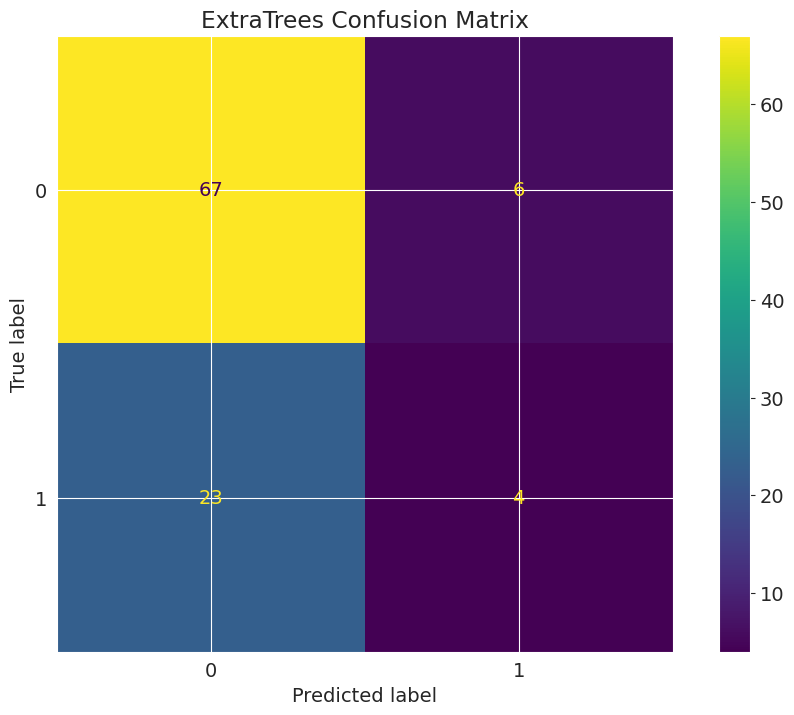

Report for DecisionTree- Train Data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       290
           1       1.00      1.00      1.00       110

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400

Report for DecisionTree- Test Data
              precision    recall  f1-score   support

           0       0.73      0.70      0.71        73
           1       0.27      0.30      0.28        27

    accuracy                           0.59       100
   macro avg       0.50      0.50      0.50       100
weighted avg       0.60      0.59      0.60       100



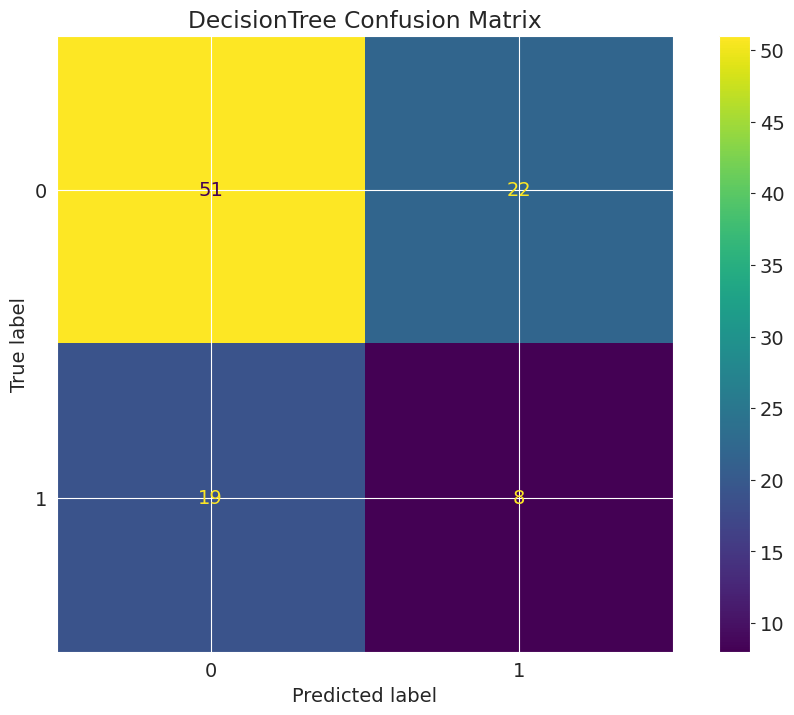

Report for RandomForest- Train Data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       290
           1       1.00      1.00      1.00       110

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400

Report for RandomForest- Test Data
              precision    recall  f1-score   support

           0       0.72      0.93      0.81        73
           1       0.17      0.04      0.06        27

    accuracy                           0.69       100
   macro avg       0.45      0.48      0.44       100
weighted avg       0.57      0.69      0.61       100



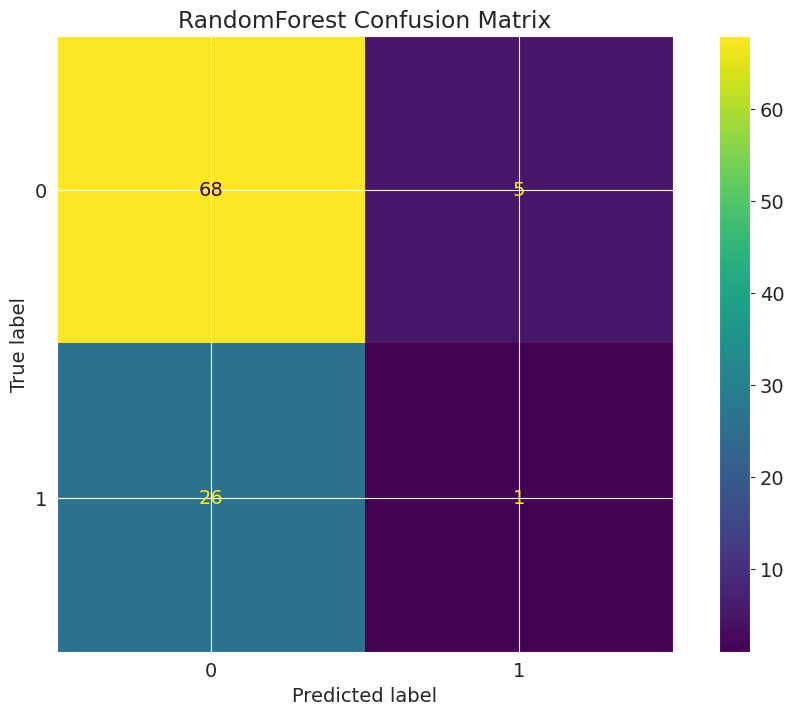

Report for GradientBoosting- Train Data
              precision    recall  f1-score   support

           0       0.87      0.99      0.93       290
           1       0.97      0.61      0.75       110

    accuracy                           0.89       400
   macro avg       0.92      0.80      0.84       400
weighted avg       0.90      0.89      0.88       400

Report for GradientBoosting- Test Data
              precision    recall  f1-score   support

           0       0.72      0.93      0.81        73
           1       0.17      0.04      0.06        27

    accuracy                           0.69       100
   macro avg       0.45      0.48      0.44       100
weighted avg       0.57      0.69      0.61       100



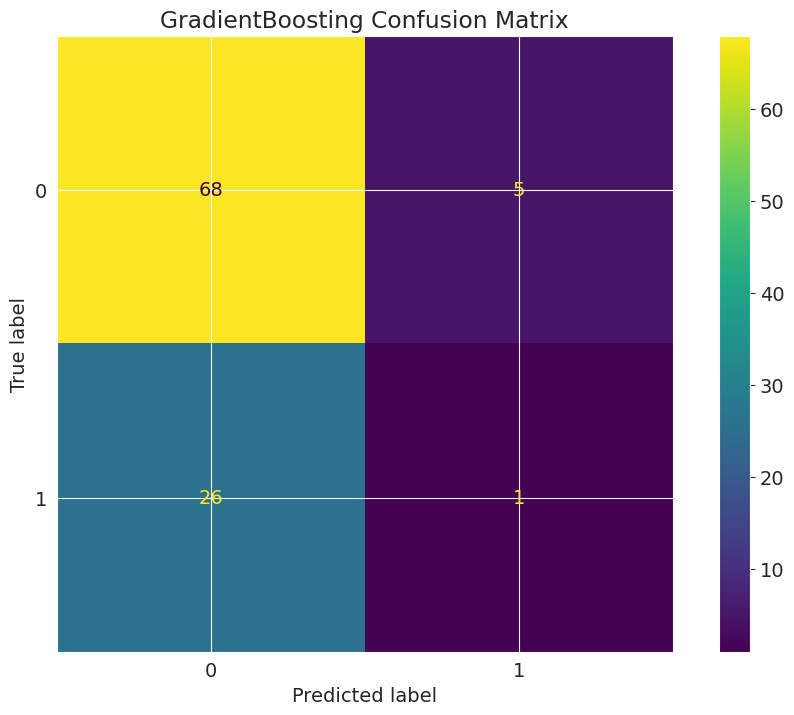

Report for XGB- Train Data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       290
           1       1.00      1.00      1.00       110

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400

Report for XGB- Test Data
              precision    recall  f1-score   support

           0       0.73      0.84      0.78        73
           1       0.29      0.19      0.23        27

    accuracy                           0.66       100
   macro avg       0.51      0.51      0.50       100
weighted avg       0.62      0.66      0.63       100



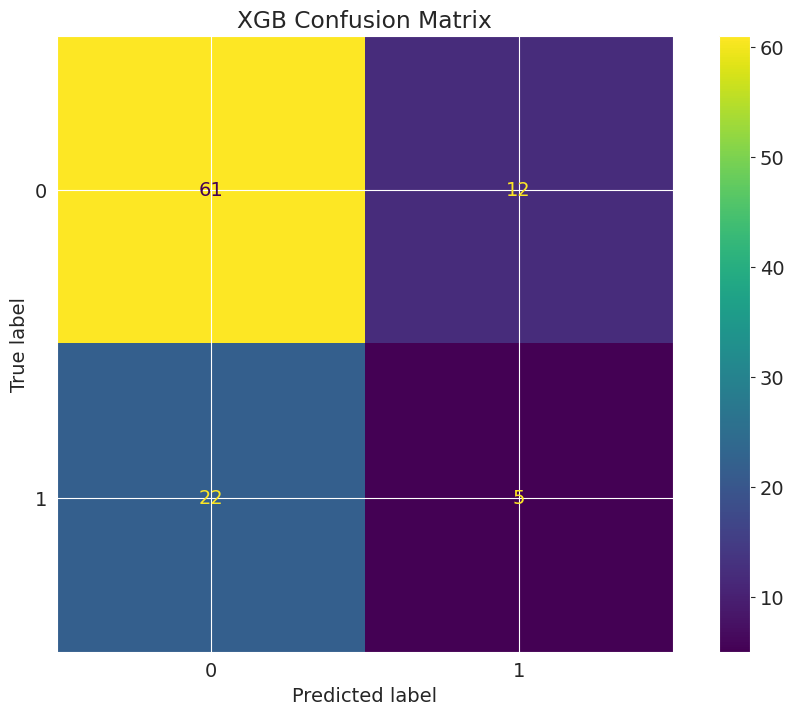

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 110, number of negative: 290
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000071 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 209
[LightGBM] [Info] Number of data points in the train set: 400, number of used features: 27
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.275000 -> initscore=-0.969401
[LightGBM] [Info] Start training from score -0.969401
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

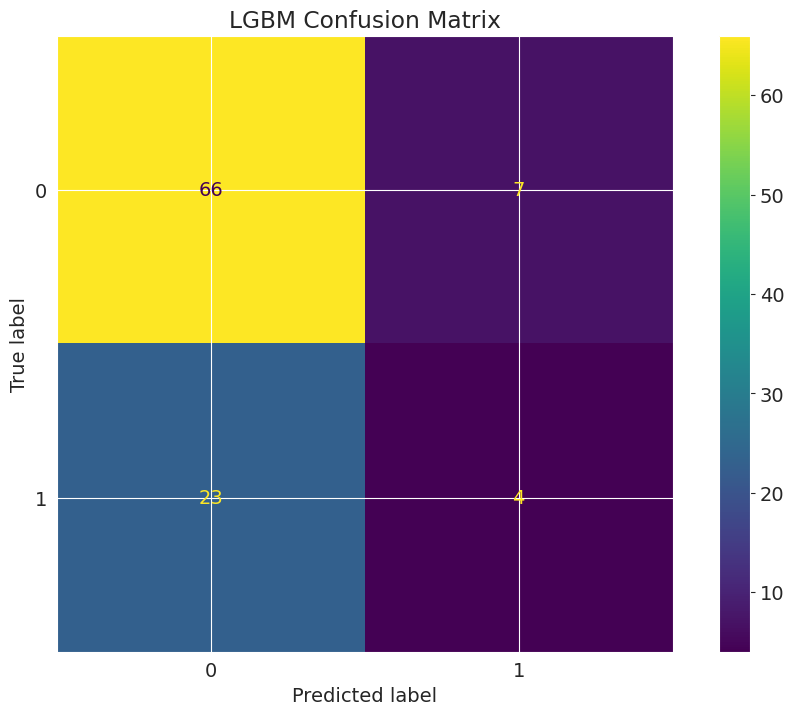

Report for AdaBoost- Train Data
              precision    recall  f1-score   support

           0       0.73      0.99      0.84       290
           1       0.60      0.05      0.10       110

    accuracy                           0.73       400
   macro avg       0.67      0.52      0.47       400
weighted avg       0.70      0.73      0.64       400

Report for AdaBoost- Test Data
              precision    recall  f1-score   support

           0       0.73      0.99      0.84        73
           1       0.00      0.00      0.00        27

    accuracy                           0.72       100
   macro avg       0.36      0.49      0.42       100
weighted avg       0.53      0.72      0.61       100



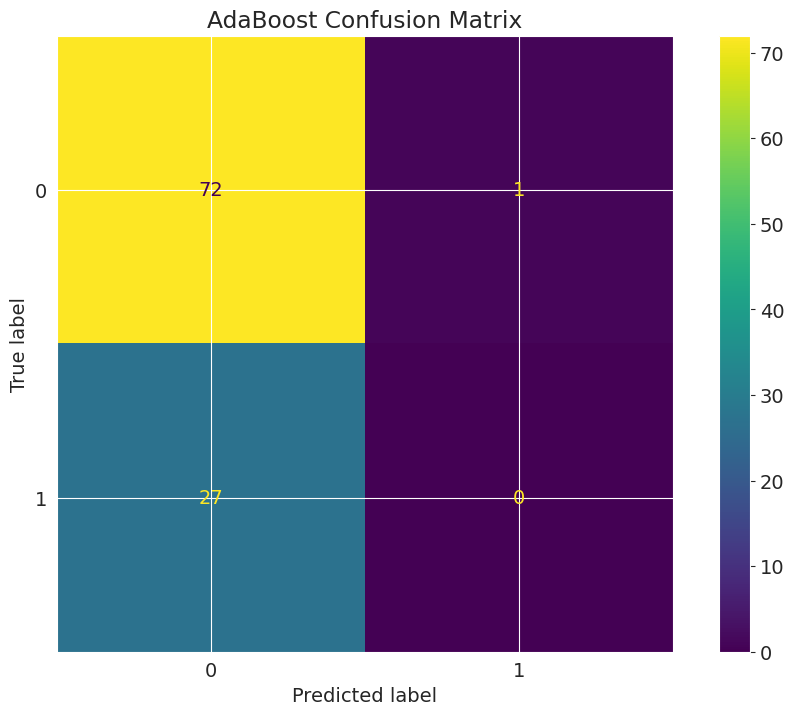

In [14]:
plt.figure(figsize=(6, 4))
# Define classifiers
Classifiers = [
    ['ExtraTrees', ExtraTreesClassifier()],
    ['DecisionTree', DecisionTreeClassifier()],
    ['RandomForest', RandomForestClassifier()],
    ['GradientBoosting', GradientBoostingClassifier()],
    ['XGB', XGBClassifier()],
    ['LGBM', LGBMClassifier()],
    ['AdaBoost', AdaBoostClassifier()]
]

# DataFrame to store performance metrics
results_list = []
# DataFrame to store predictions
predictions_df = pd.DataFrame()
predictions_df["True_Label"] = y_test

for name, clf in Classifiers:
    clf.fit(X_train, y_train)
    train_predictions = clf.predict(X_train)
    test_predictions = clf.predict(X_test)

    # Compute evaluation metrics
    train_f1 = f1_score(y_train, train_predictions)
    test_f1 = f1_score(y_test, test_predictions)
    train_recall = recall_score(y_train, train_predictions)
    test_recall = recall_score(y_test, test_predictions)

    # Store predictions
    predictions_df[name] = test_predictions

    print(f"Report for {name}- Train Data")
    print(classification_report(y_train, train_predictions))

    print(f"Report for {name}- Test Data")
    print(classification_report(y_test, test_predictions))
    # Store model performance
    results_list.append({
        "Model": name,
        "Train F1": round(train_f1, 2),
        "Test F1": round(test_f1, 2),
        "Train Recall": round(train_recall, 2),
        "Test Recall": round(test_recall, 2)
    })

    # Generate array of values for confusion matrix

    cm = confusion_matrix(y_test, test_predictions)

# Plot confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,)
    disp.plot(values_format='');
    plt.title(f"{name} Confusion Matrix")
    plt.show()


From the above result **Decision Tree** seems outperform other models with F1 and Recall Score with the smote data. And also **GradientBoosting** seems to be best the model among all using **variance** the difference between the **F1 Score** and **Recall** for test and train data.

But will consider **Decision Tree** as it has higher **Recall** for **loan default** than **GradientBoosting**
Recall and F1 score are adopted as the metric for the following reasons

1. **Recall:** Missing actual default cases will incur financial loss to the company than predicting non default as default. To prevent such to happen **Recall** is the best metric to choose.
2. **F1 Score:** Due to imbalance data set F1 score is good for our case.

### Fine Tuning Model

### Decision tree <a id='dt'></a>

In [15]:
# Sample weights to handle imbalance
def get_sample_weights(y):
    return compute_sample_weight(class_weight="balanced", y=y)

# Define the model
tree = DecisionTreeClassifier(random_state=42)

# Define hyperparameters to tune
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 4, 8, None],
    'min_samples_split': [2, 6, 8],
    'min_samples_leaf': [1, 2, 5, 10],
    'class_weight': [None, 'balanced'],
}

# Perform Grid Search with cross-validation
grid_search = GridSearchCV(
    tree, param_grid, cv=5, scoring='f1', n_jobs=-1, verbose=1
)

# Fit the model
grid_search.fit(X_train, y_train, sample_weight=get_sample_weights(y_train))

# Best parameters
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

# Best model
best_tree = grid_search.best_estimator_


Fitting 5 folds for each of 192 candidates, totalling 960 fits
Best parameters: {'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best score: 0.40501049233496766


In [61]:
best_tree

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=4, random_state=42)

In [16]:
tree_final = DecisionTreeClassifier(class_weight='balanced', criterion='entropy',min_samples_split= 2,
                       max_depth=4, min_samples_leaf=1, random_state=42)

In [17]:
%%time
tree_final.fit(X_train, y_train)

CPU times: user 9.41 ms, sys: 0 ns, total: 9.41 ms
Wall time: 29.5 ms


DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=4, random_state=42)

In [18]:
train_pred = tree_final.predict(X_train)
test_pred = tree_final.predict(X_test)

In [19]:
# Create classification report
target_names = ['Non Default', 'Default']
print(classification_report(y_train, train_pred, target_names=target_names))

              precision    recall  f1-score   support

 Non Default       0.84      0.76      0.79       290
     Default       0.49      0.62      0.55       110

    accuracy                           0.72       400
   macro avg       0.66      0.69      0.67       400
weighted avg       0.74      0.72      0.73       400



In [20]:
# Create classification report for test set
print(classification_report(y_test, test_pred, target_names=target_names))

              precision    recall  f1-score   support

 Non Default       0.73      0.60      0.66        73
     Default       0.28      0.41      0.33        27

    accuracy                           0.55       100
   macro avg       0.50      0.51      0.50       100
weighted avg       0.61      0.55      0.57       100



<Figure size 800x700 with 0 Axes>

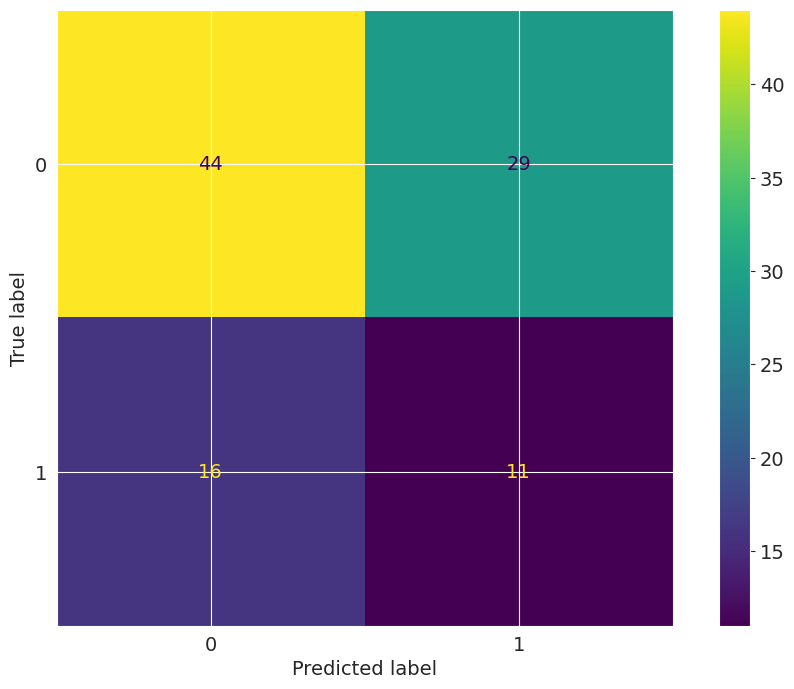

In [21]:
# Generate array of values for confusion matrix
plt.figure(figsize=(8, 7))
cm = confusion_matrix(y_test,test_pred, labels=tree_final.classes_)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=tree_final.classes_)
disp.plot(values_format='');

### Model Interpretation<a id='mi'></a>

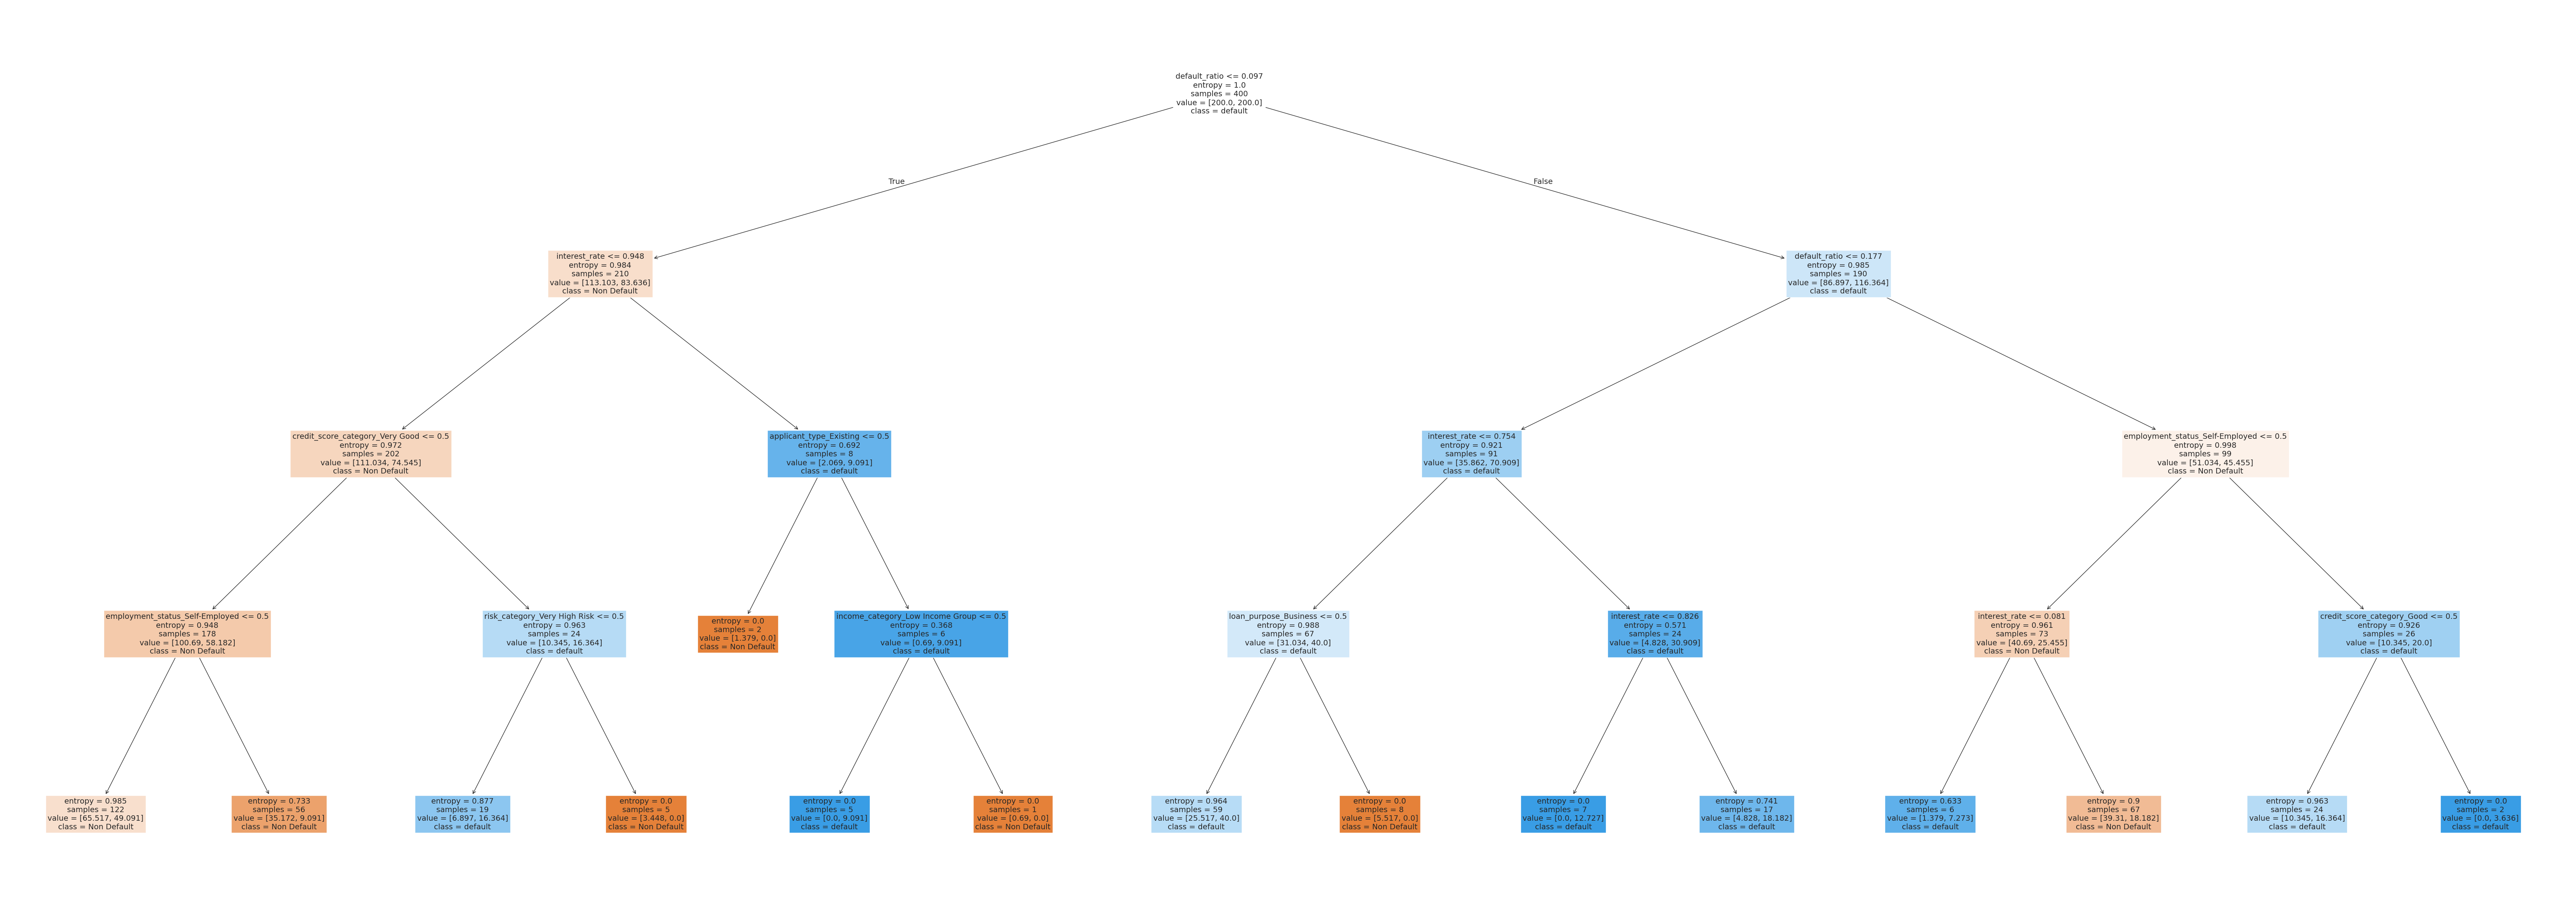

<Figure size 1200x800 with 0 Axes>

In [22]:
# Plot the tree
class_names = ['Non Default', 'default']

plt.figure(figsize=(85,30))
plot_tree(tree_final, max_depth=6, fontsize=14, feature_names=all_feature_names,
          class_names=class_names, filled=True);
plt.show()
plt.savefig("decisiontree.png")

Note that you can double-click on the tree image to zoom in on it and inspect the splits.

#### Decision tree feature importance



In [23]:
#tree2_importances =
tree2_importances = pd.DataFrame(tree_final.feature_importances_,
                                 columns=['gini_importance'],
                                 index=all_feature_names
                                )
tree2_importances = tree2_importances.sort_values(by='gini_importance', ascending=False)

# Only extract the features with importances > 0
tree2_importances = tree2_importances[tree2_importances['gini_importance'] != 0]
tree2_importances

,gini_importance
interest_rate,0.321607
default_ratio,0.167186
employment_status_Self-Employed,0.138066
loan_purpose_Business,0.098872
risk_category_Very High Risk,0.074896
applicant_type_Existing,0.057995
credit_score_category_Very Good,0.057441
income_category_Low Income Group,0.050617
credit_score_category_Good,0.033319


You can then create a barplot to visualize the decision tree feature importances.

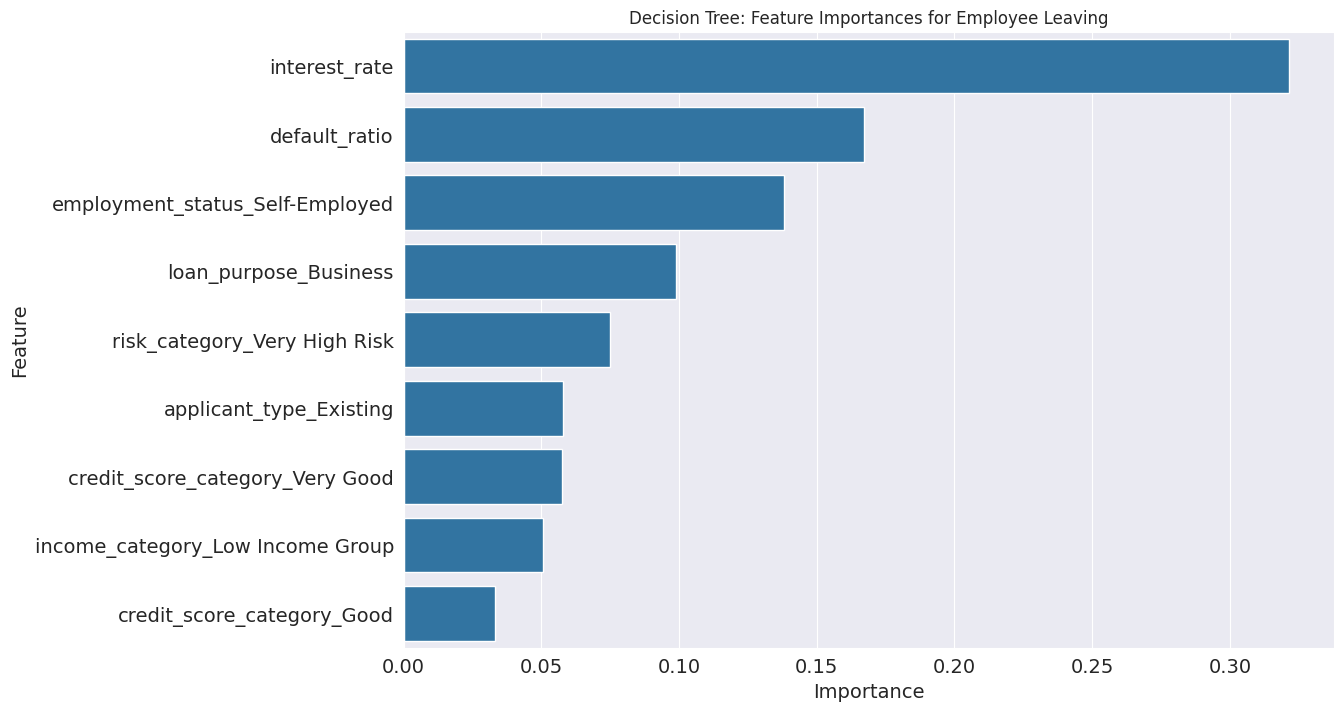

In [24]:
plt.figure(figsize=(12,8))
sns.barplot(data=tree2_importances, x="gini_importance", y=tree2_importances.index, orient='h')
plt.title("Decision Tree: Feature Importances for Employee Leaving", fontsize=12)
plt.ylabel("Feature")
plt.xlabel("Importance")
plt.savefig("decisiontree.png")
plt.show()

In [25]:
all_feature_names

['interest_rate',
 'default_ratio',
 'employment_status_Employed',
 'employment_status_Self-Employed',
 'employment_status_Unemployed',
 'loan_purpose_Business',
 'loan_purpose_Education',
 'loan_purpose_Home Improvement',
 'loan_purpose_Medical',
 'loan_purpose_Personal',
 'applicant_type_Existing',
 'applicant_type_First-Timer',
 'risk_category_High Risk',
 'risk_category_Low Risk',
 'risk_category_Moderate Risk',
 'risk_category_Very High Risk',
 'credit_score_category_Excellent',
 'credit_score_category_Fair',
 'credit_score_category_Good',
 'credit_score_category_Poor',
 'credit_score_category_Very Good',
 'term_category_Long',
 'term_category_Medium',
 'term_category_Short',
 'income_category_Low Income Group',
 'income_category_Lower-Middle Income',
 'income_category_Upper-Middle Income']

In [74]:
# load JS visualization code to notebook
shap.initjs()

# Create the explainer
explainer = shap.TreeExplainer(tree_final)

shap_values = explainer.shap_values(tree_final)

<Figure size 1200x800 with 0 Axes>

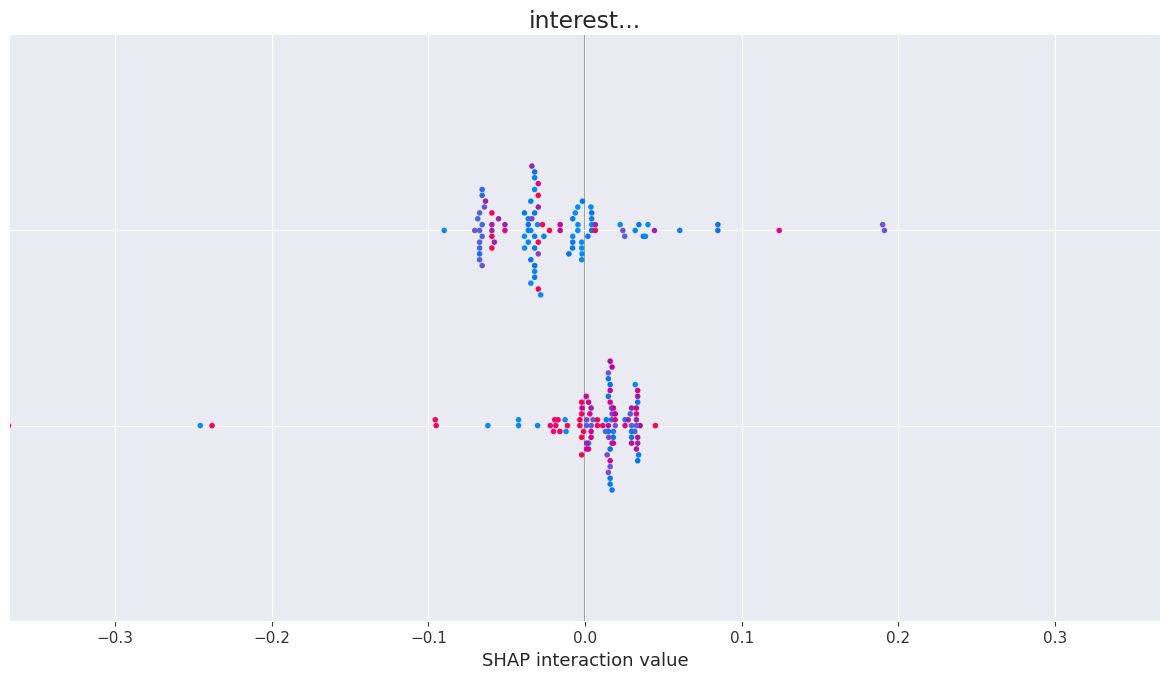

In [45]:
# Use SHAP Explainer for DecisionTreeClassifier
explainer = shap.Explainer(tree_final, X_test)  # Use encoded data for SHAP

# Compute SHAP values
shap_values = explainer(X_test)

# Summary plot
shap.summary_plot(shap_values, X_test)


### Tune XGBClassifier for Explainable<a id='ex'></a>

In [46]:
# Initialize XGBClassifier
clf = XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    max_depth=3,
    learning_rate=0.1,
    scale_pos_weight=sum(y_train == 0) / sum(y_train == 1),
    enable_categorical=True,
    random_state=42
)

# Fit the model
clf.fit(X_train, y_train, eval_set=[(X_test, y_test)])

[0]	validation_0-logloss:0.68979
[1]	validation_0-logloss:0.68641
[2]	validation_0-logloss:0.68492
[3]	validation_0-logloss:0.68475
[4]	validation_0-logloss:0.68414
[5]	validation_0-logloss:0.68255
[6]	validation_0-logloss:0.67909
[7]	validation_0-logloss:0.67597
[8]	validation_0-logloss:0.67629
[9]	validation_0-logloss:0.67358
[10]	validation_0-logloss:0.67301
[11]	validation_0-logloss:0.66783
[12]	validation_0-logloss:0.66675
[13]	validation_0-logloss:0.66272
[14]	validation_0-logloss:0.66240
[15]	validation_0-logloss:0.66391
[16]	validation_0-logloss:0.66118
[17]	validation_0-logloss:0.66013
[18]	validation_0-logloss:0.65953
[19]	validation_0-logloss:0.65885
[20]	validation_0-logloss:0.65734
[21]	validation_0-logloss:0.65688
[22]	validation_0-logloss:0.65725
[23]	validation_0-logloss:0.65715
[24]	validation_0-logloss:0.65722
[25]	validation_0-logloss:0.65458
[26]	validation_0-logloss:0.65343
[27]	validation_0-logloss:0.65388
[28]	validation_0-logloss:0.65277
[29]	validation_0-loglos

In [47]:
# Predictions
y_pred_proba = clf.predict_proba(X_test)[:, 1]
y_pred_train = clf.predict(X_train)
y_pred = clf.predict(X_test)

In [48]:
y_pred_proba

array([0.31517807, 0.33108598, 0.36007673, 0.4236165 , 0.65410155,
       0.49944463, 0.41955358, 0.4467055 , 0.67803764, 0.1567488 ,
       0.25201473, 0.63081914, 0.37426633, 0.7161265 , 0.266013  ,
       0.4316603 , 0.16273594, 0.11463572, 0.2878563 , 0.1056192 ,
       0.08648144, 0.53548986, 0.6933103 , 0.33556482, 0.2197371 ,
       0.40382972, 0.2881744 , 0.47282988, 0.49412385, 0.0703768 ,
       0.20292604, 0.26035458, 0.1630534 , 0.5738284 , 0.511408  ,
       0.33141267, 0.6870755 , 0.6081946 , 0.30611038, 0.13891922,
       0.31930065, 0.43624148, 0.41999227, 0.8503849 , 0.34264702,
       0.5270751 , 0.4254236 , 0.40585983, 0.4827349 , 0.52894855,
       0.25074747, 0.76054233, 0.3263869 , 0.381125  , 0.4687566 ,
       0.6862571 , 0.54069954, 0.20333196, 0.735965  , 0.15921573,
       0.39173716, 0.2346004 , 0.31355724, 0.6932424 , 0.04815616,
       0.32976678, 0.538269  , 0.33980587, 0.70750684, 0.06845638,
       0.2030588 , 0.45735964, 0.22817096, 0.05085451, 0.41476

In [53]:
# classification_report for training
print("Classification Report for Training:\n", classification_report(y_train, y_pred_train,  target_names=target_names))

Classification Report for Training:
               precision    recall  f1-score   support

 Non Default       0.95      0.88      0.91       290
     Default       0.73      0.87      0.80       110

    accuracy                           0.88       400
   macro avg       0.84      0.88      0.85       400
weighted avg       0.89      0.88      0.88       400



In [54]:
print("Classification Report Testing:\n", classification_report(y_test, y_pred,  target_names=target_names))

Classification Report Testing:
               precision    recall  f1-score   support

 Non Default       0.77      0.75      0.76        73
     Default       0.38      0.41      0.39        27

    accuracy                           0.66       100
   macro avg       0.58      0.58      0.58       100
weighted avg       0.67      0.66      0.66       100



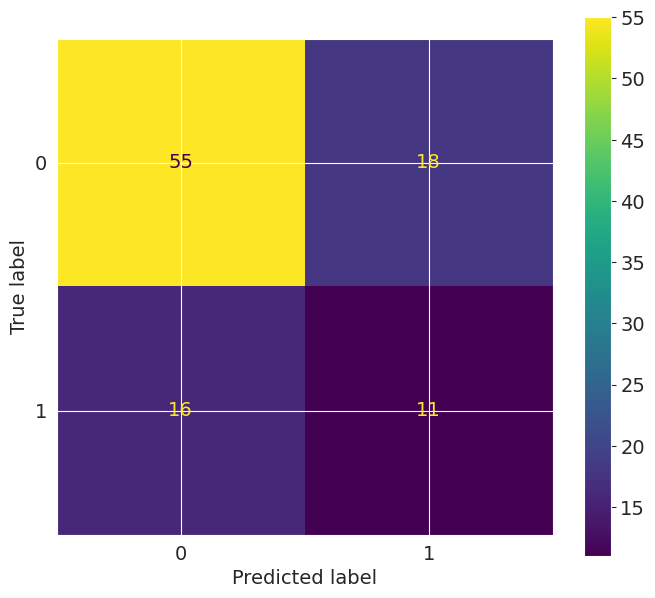

In [55]:
plt.figure(figsize=(8, 7))
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix without gridlines
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
ax = disp.plot(values_format='', ax=plt.gca())  # Specify the axes

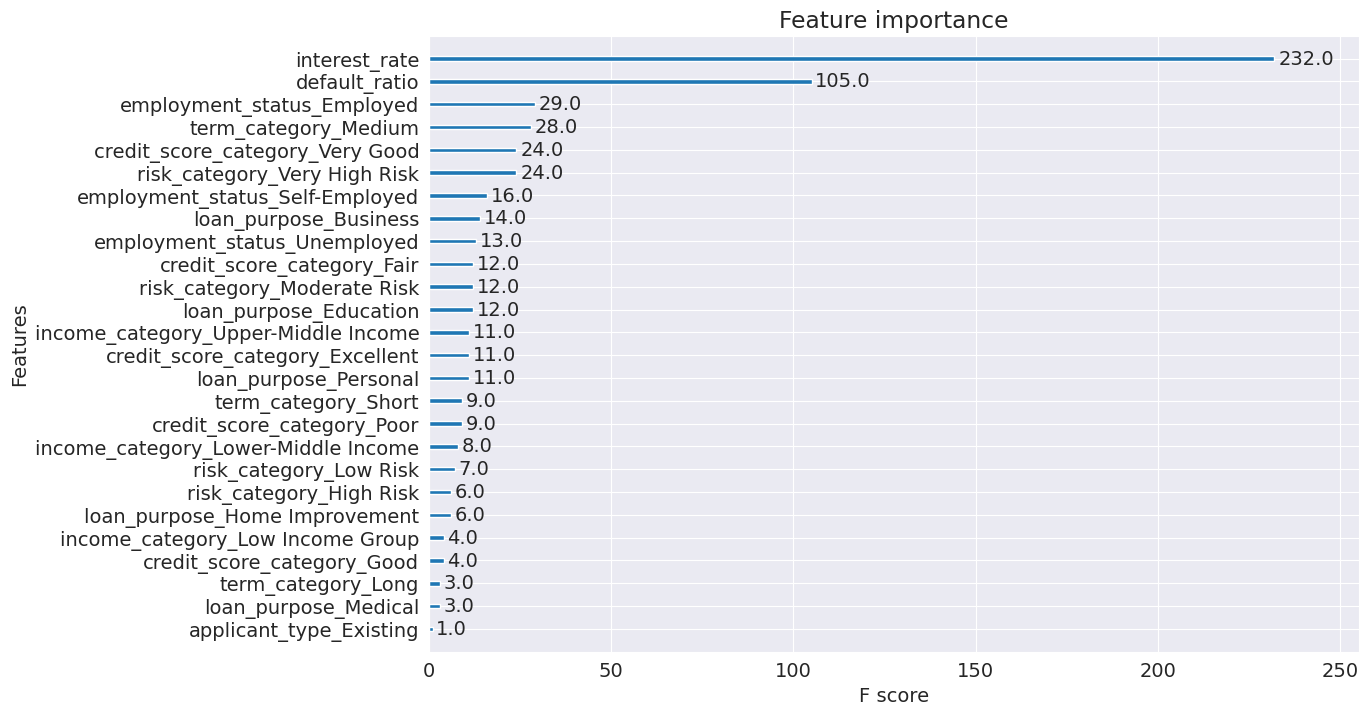

In [60]:
# Feature Importance for CLf
import xgboost as xgb
xgb.plot_importance(clf)
plt.show()

In [65]:
explainer = shap.TreeExplainer(model = clf, data= None, model_output='raw',
                               feature_perturbation='tree_path_dependent')


In [ ]:
shap_values = explainer.shap_values(X_test)

In [73]:
# plot for first samples
shap.initjs()
shap.force_plot(
    base_value=explainer.expected_value[0],
    shap_values=shap_values[0],
    features=X_test.iloc[0, :]
)



In [76]:
# plot for first 50 samples
shap.initjs()
shap.force_plot(
    base_value=explainer.expected_value[0],
    shap_values=shap_values[:50],  # First 50 samples
    features=X_test.iloc[:50, :]
)


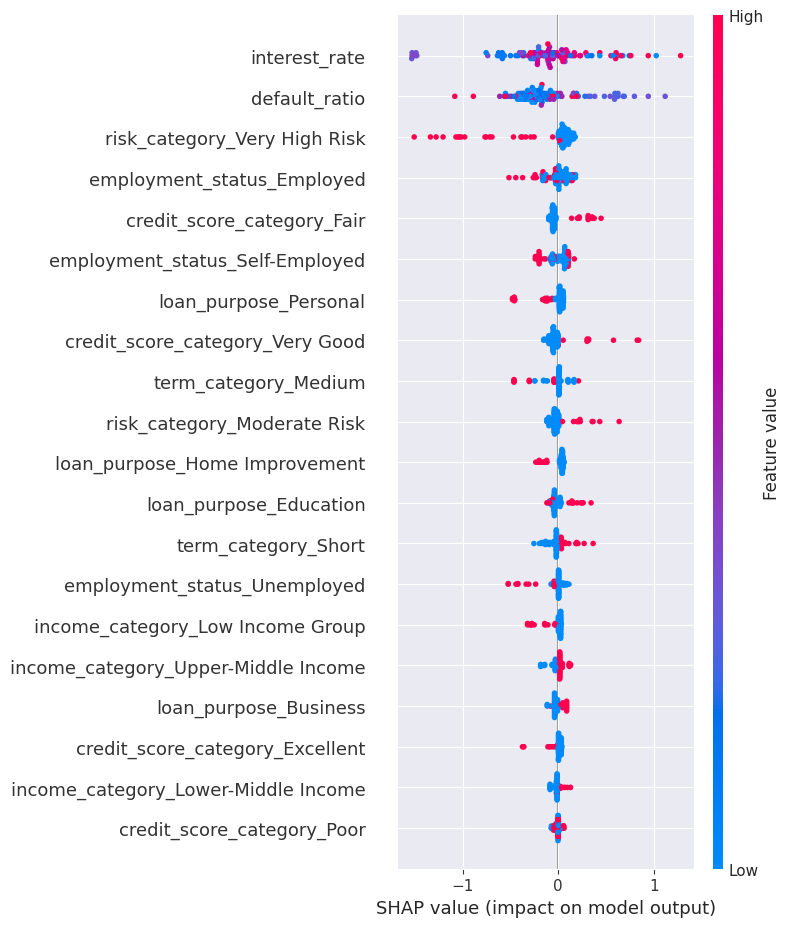

In [78]:

# Summary plot
shap.summary_plot(shap_values,X_test, feature_names=all_feature_names, class_names=target_names)


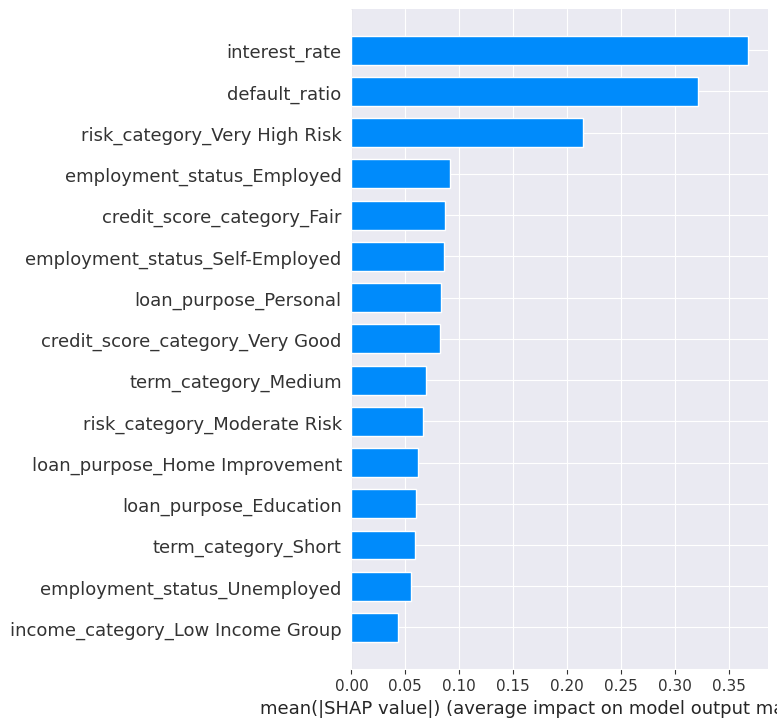

In [81]:
# Summary plot
shap.summary_plot(shap_values,X_test, feature_names=all_feature_names, plot_type='bar', max_display=15)

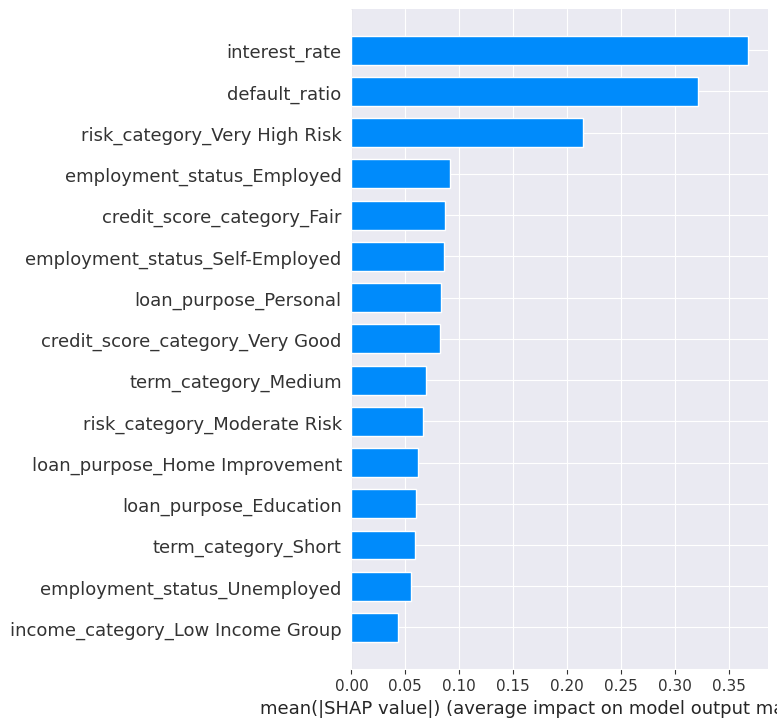

In [84]:
# Summary plot for defaut
shap.summary_plot(shap_values,X_test, feature_names=all_feature_names, plot_type='bar', max_display=15, class_inds=1)

In [85]:
model_filename = 'model_xgboost.pkl'
with open(model_filename, 'wb') as model_file:
    pickle.dump(clf, model_file)


# pacE: Execute Stage<a id='es'></a>
- Interpret model performance and results
- Share actionable steps with stakeholders



### Conclusion and Recommendations<a id='cr'></a>

* The models and the feature importances extracted from the models confirm that defaultors are charged at higher interest rate.

* Applicants with higher risk that debt to income ratio category are more likey to default.

* Applicants with default history should be crutinised for their next loan

To avoid financial loss due to default, the following recommendations could be presented to the stakeholders:

* Should not offer loan to applicants with high debt to income ratio of more than **50%**.
* Make the interest rate more reasonable at below **20%**
.


# Reference <a id ='r'></a>

* [SHAP Documentation](https://shap.readthedocs.io/en/latest/example_notebooks/api_examples/plots/decision_plot.html)

* [FICO Credit Score](https://www.investopedia.com/terms/f/ficoscore.asp)

* [Salary Levels in Ghana](https://data.who.int/countries/288)
